# <ins>Classification Task</ins>

# 1.Data Collection and Exploration

In [1]:
# Import all necessary library for data exploration.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(color_codes=True)
import warnings

In [2]:
# To ignore the warning message that is displayed if any warning occurs.
warnings.filterwarnings("ignore")

In [3]:
# Load the data using pandas library.
df = pd.read_excel(r"C:\Users\aksha\OneDrive\Desktop\Python files\sydney_rain prediction.xlsx", header=0)

In [4]:
# Analysing the first 10 rows of the dataframe to Analyse the data.
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
5,2008-02-06,Sydney,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes
6,2008-02-07,Sydney,18.6,26.3,6.2,5.2,5.2,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,Yes
7,2008-02-08,Sydney,17.2,22.3,27.6,5.8,2.1,77.0,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,Yes,Yes
8,2008-02-09,Sydney,16.4,20.8,12.6,4.8,3.0,92.0,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,Yes,Yes
9,2008-02-10,Sydney,14.6,24.2,8.8,4.4,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,Yes,No


In [5]:
# Getting data info to find if there is any missing value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [6]:
# Getting Extended data dictionary to check outliers.
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [7]:
# Getting the correlation among different variables.
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.770893,0.012883,0.571257,-0.063154,0.052490,0.271686,-0.393827,-0.356406,0.260508,0.180094,0.939116,0.752922
MaxTemp,0.770893,1.000000,-0.140107,0.513138,0.326683,-0.187437,-0.152615,-0.389088,-0.425169,-0.095859,-0.108426,0.859346,0.960457
Rainfall,0.012883,-0.140107,1.000000,-0.126143,-0.308044,0.331045,0.301681,-0.037051,0.003216,0.277427,0.229576,-0.056061,-0.143698
Evaporation,0.571257,0.513138,-0.126143,1.000000,0.177628,-0.399019,-0.103246,-0.349421,-0.303330,-0.041160,-0.041205,0.608872,0.477629
Sunshine,-0.063154,0.326683,-0.308044,0.177628,1.000000,-0.490967,-0.585736,-0.046654,-0.094841,-0.734302,-0.751838,0.115135,0.345139
Humidity9am,0.052490,-0.187437,0.331045,-0.399019,-0.490967,1.000000,0.659194,0.263977,0.252360,0.459455,0.359910,-0.148239,-0.157598
Humidity3pm,0.271686,-0.152615,0.301681,-0.103246,-0.585736,0.659194,1.000000,0.154908,0.183647,0.498119,0.517755,0.128818,-0.214047
Pressure9am,-0.393827,-0.389088,-0.037051,-0.349421,-0.046654,0.263977,0.154908,1.000000,0.963173,-0.012196,-0.044233,-0.419440,-0.346731
Pressure3pm,-0.356406,-0.425169,0.003216,-0.303330,-0.094841,0.252360,0.183647,0.963173,1.000000,0.020884,-0.003187,-0.405047,-0.392653
Cloud9am,0.260508,-0.095859,0.277427,-0.041160,-0.734302,0.459455,0.498119,-0.012196,0.020884,1.000000,0.609556,0.097135,-0.098202


# ----------------------------------------------------------------------------------------------------------------

# 2. Data Preprocessing

## a) Missing Value Imputation

In [8]:
# Getting the number of missing values for each variable

df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

### Observation:
#### Since there are a lot of missing values in few variables therefore it's our first priority to treat them

In [9]:
# Missing value imputation for each variable with their mean or median wherever required.

df.Rainfall = df.Rainfall.fillna(df.Rainfall.mean())                 # Imputing missing Rainfall values with the mean. 

df.MinTemp = df.MinTemp.fillna(df.MinTemp.mean())                    # Imputing missing MinTemp values with the mean.

df.MaxTemp = df.MaxTemp.fillna(df.MaxTemp.mean())                    # Imputing missing MaxTemp values with the mean.

df.Evaporation = df.Evaporation.fillna(df.Evaporation.median())      # Imputing missing Evaporation values with the median.

df.Sunshine = df.Sunshine.fillna(df.Sunshine.mean())                 # Imputing missing Sunshine values with the mean.

df.Humidity9am = df.Humidity9am.fillna(df.Humidity9am.median())      # Imputing missing Humidity9am values with the median.

df.Humidity3pm = df.Humidity3pm.fillna(df.Humidity3pm.median())      # Imputing missing Humidity3pm values with the median.

df.Pressure9am = df.Pressure9am.fillna(df.Pressure9am.median())      # Imputing missing Pressure9am values with the median.

df.Pressure3pm = df.Pressure3pm.fillna(df.Pressure3pm.median())      # Imputing missing Pressure3pm values with the median.

df.Cloud9am = df.Cloud9am.fillna(df.Cloud9am.median())               # Imputing missing Cloud9am values with the median.

df.Cloud3pm = df.Cloud3pm.fillna(df.Cloud3pm.median())               # Imputing missing Cloud3pm values with the median.

df.Temp9am = df.Temp9am.fillna(df.Temp9am.median())                  # Imputing missing Temp9am values with the median.

df.Temp3pm = df.Temp3pm.fillna(df.Temp3pm.median())                  # Imputing missing Temp3pm values with the median.

df.RainToday = df.RainToday.fillna(df.RainToday.mode()[0])           # Imputing missing RainToday values with the mode

In [10]:
# Checking whether the missing value imputation is done or not.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3337 non-null   object  

## b) Outlier Treatment

In [11]:
# Getting the EDD for given data

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.181510,7.179374,68.232245,54.704225,1018.347678,1016.020375,4.320348,4.181900,17.820198,21.533054
std,4.551593,4.493290,9.886270,2.756505,3.801737,15.053751,16.261954,7.000519,7.012189,2.524256,2.410918,4.894258,4.301163
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [12]:
# Creating an object for numerical data.

numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                     'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

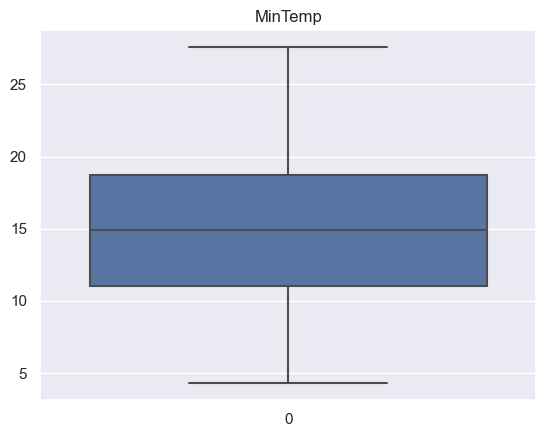

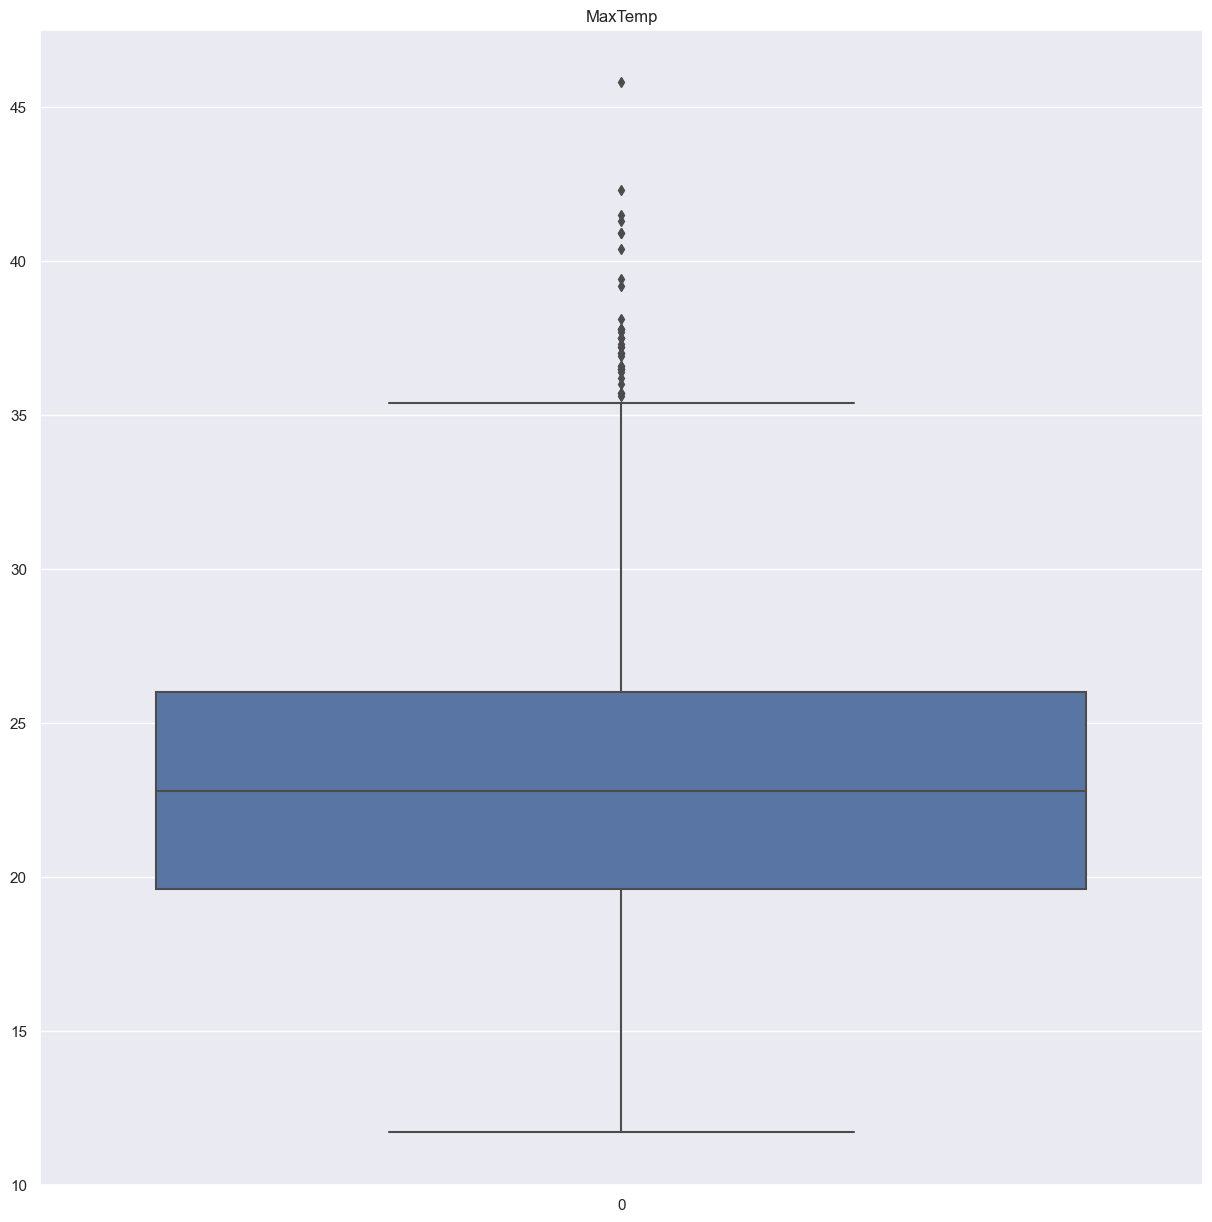

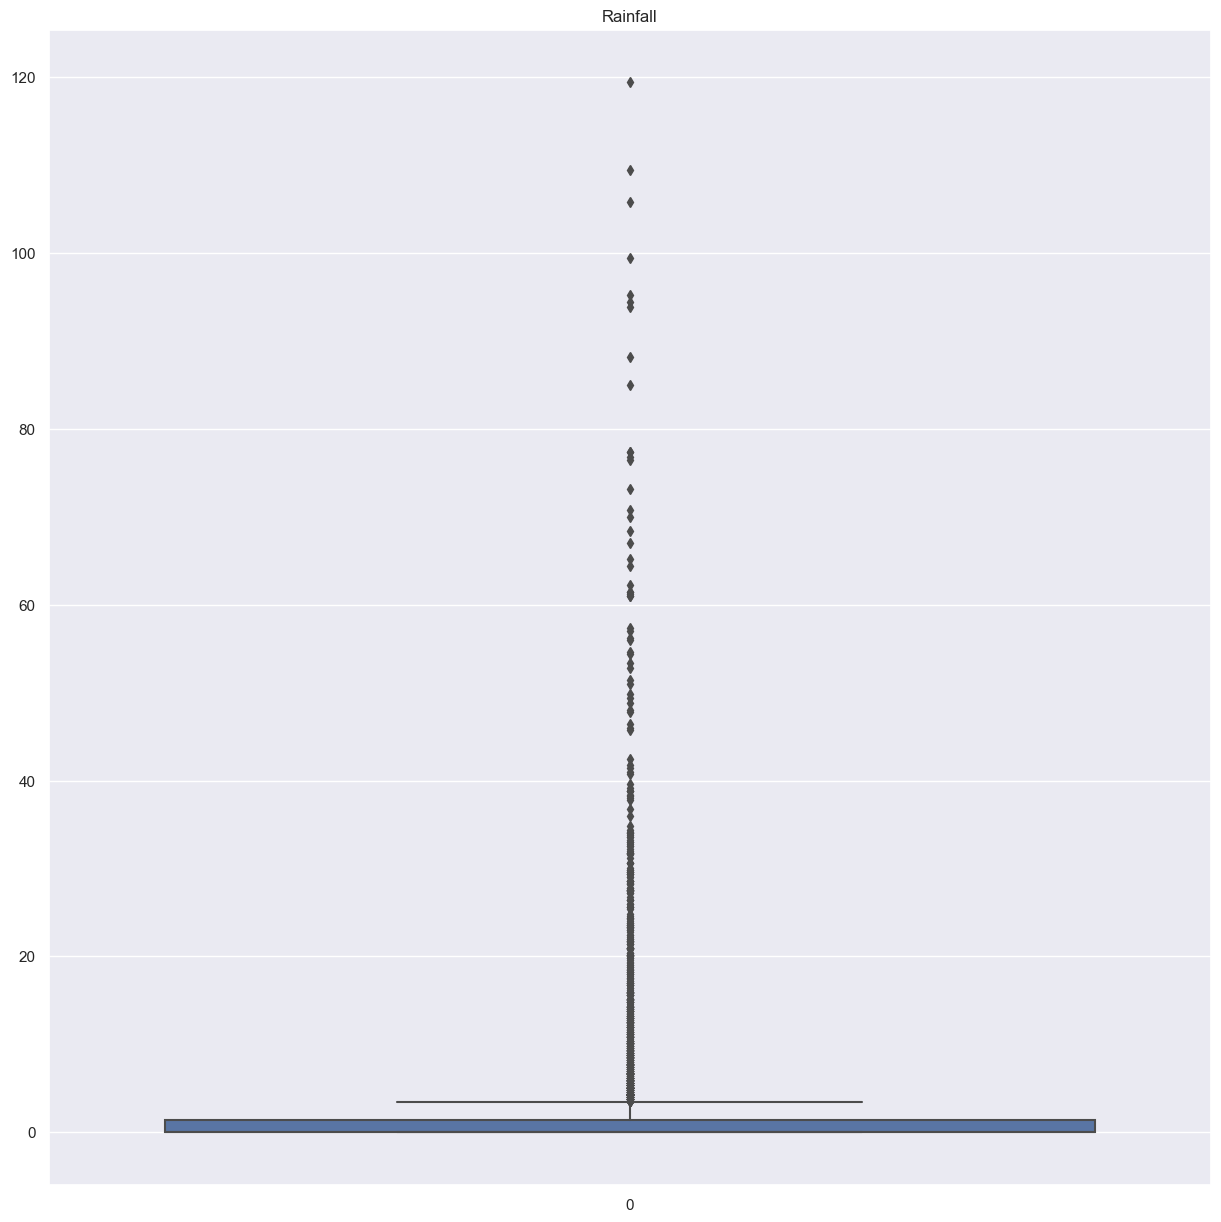

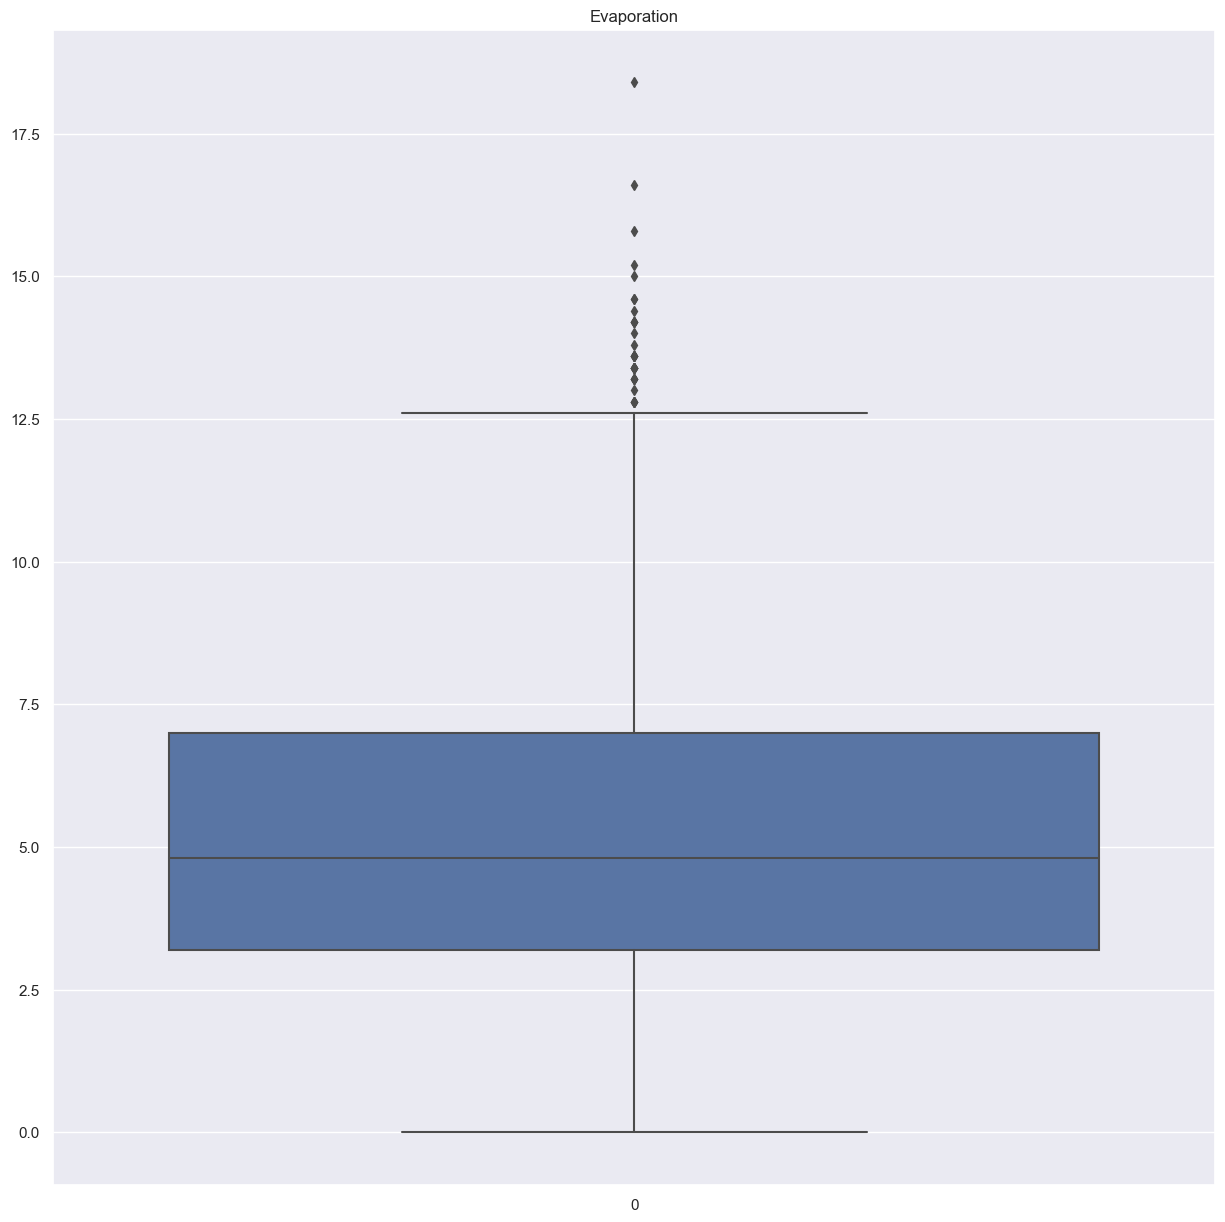

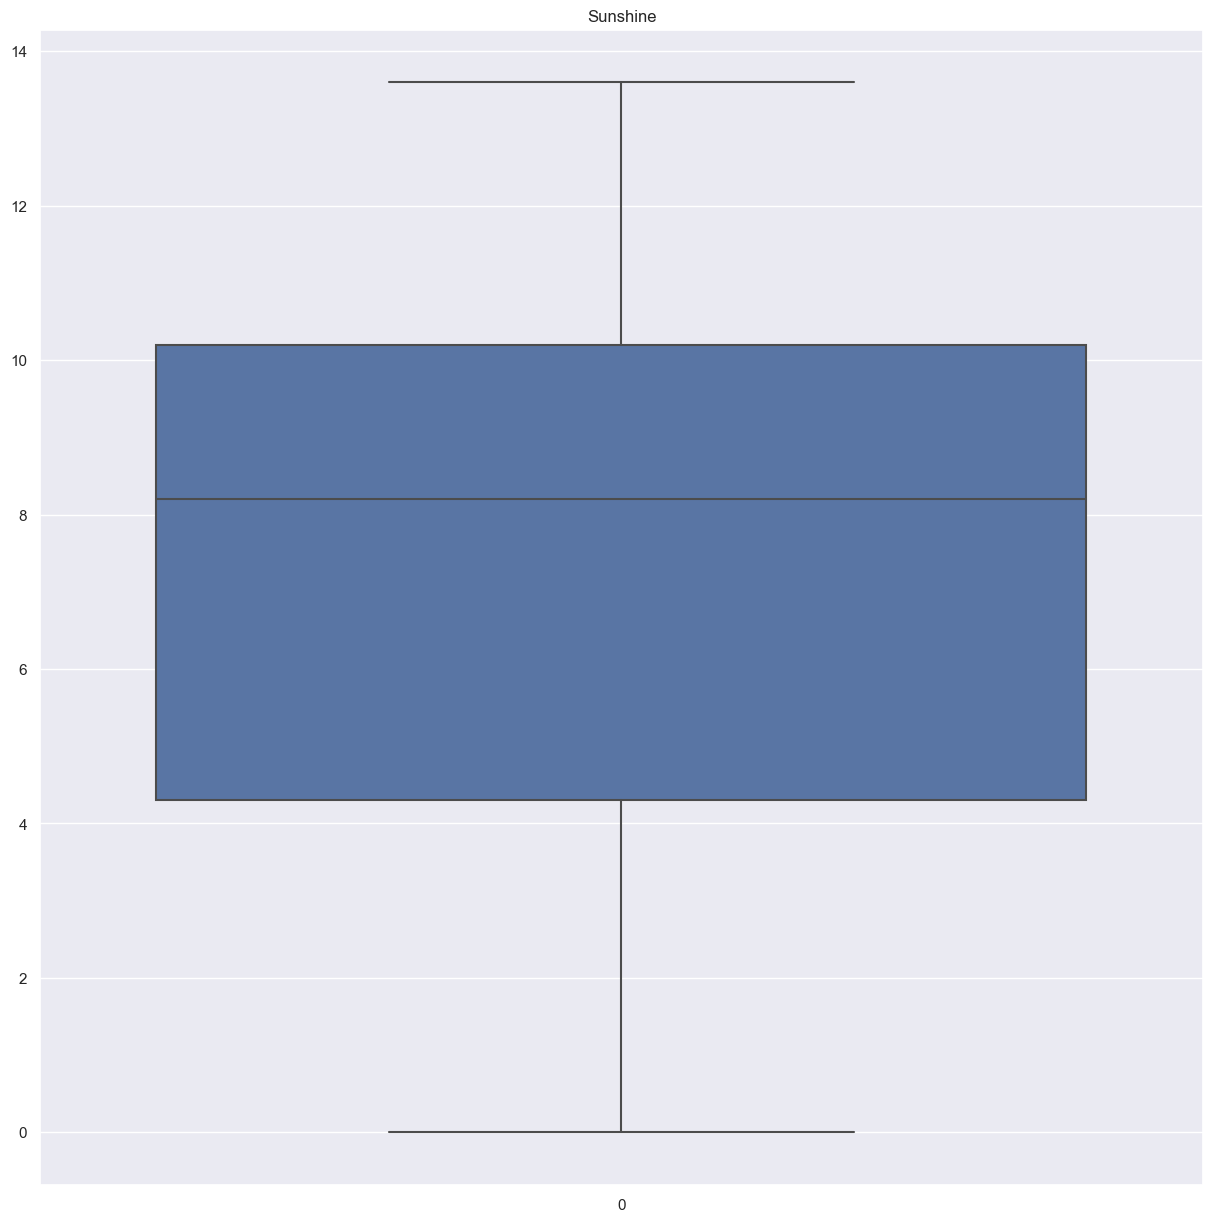

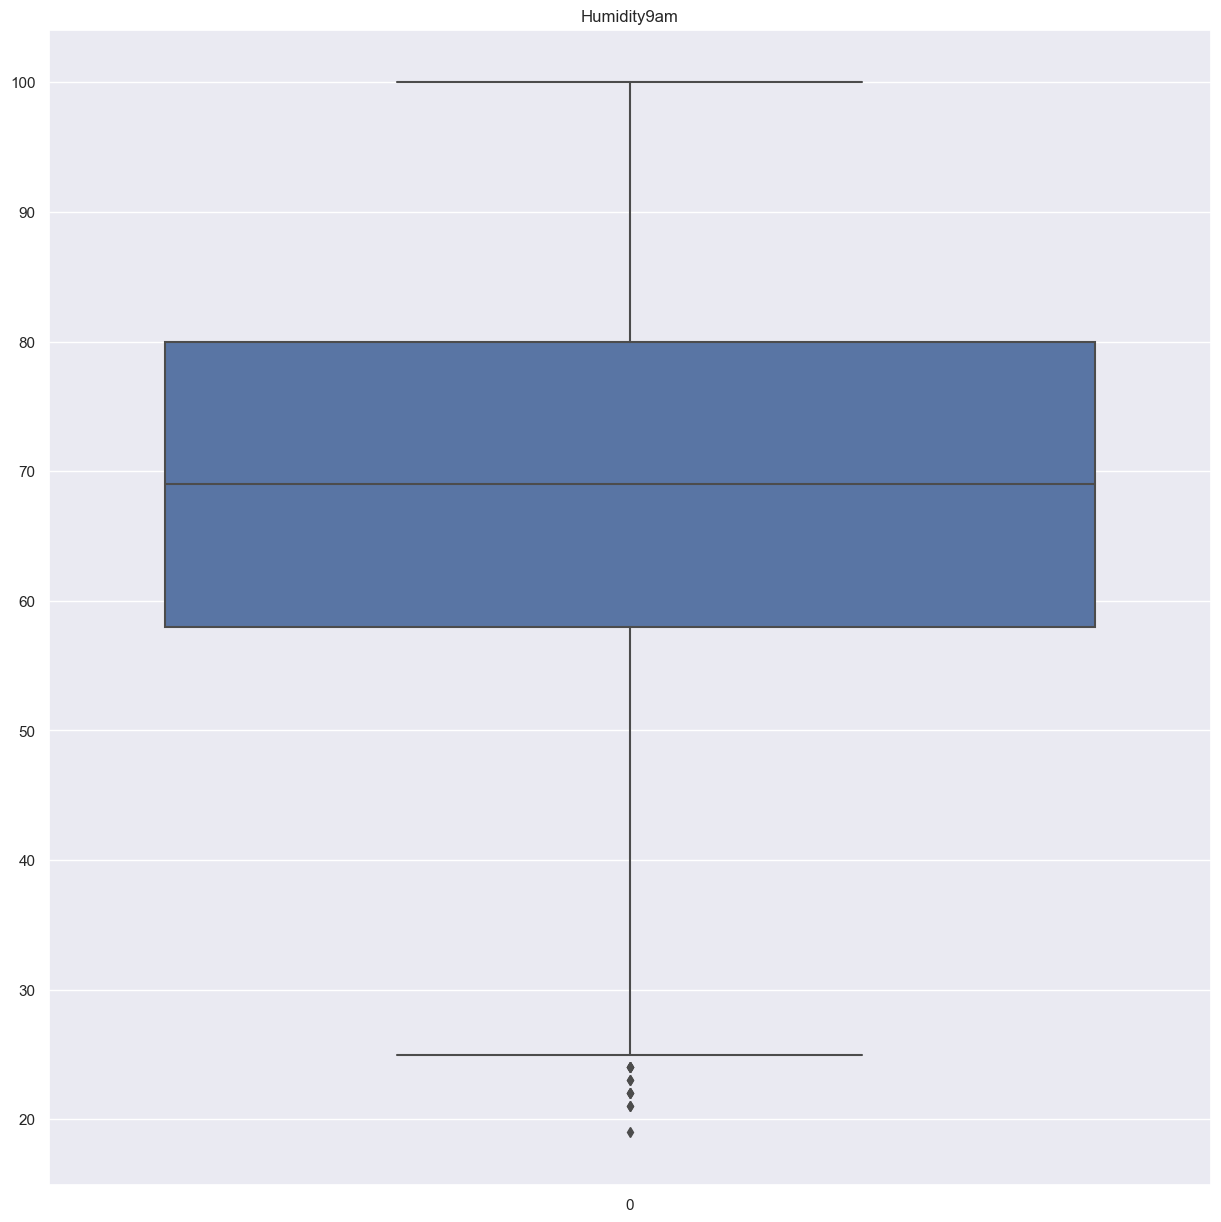

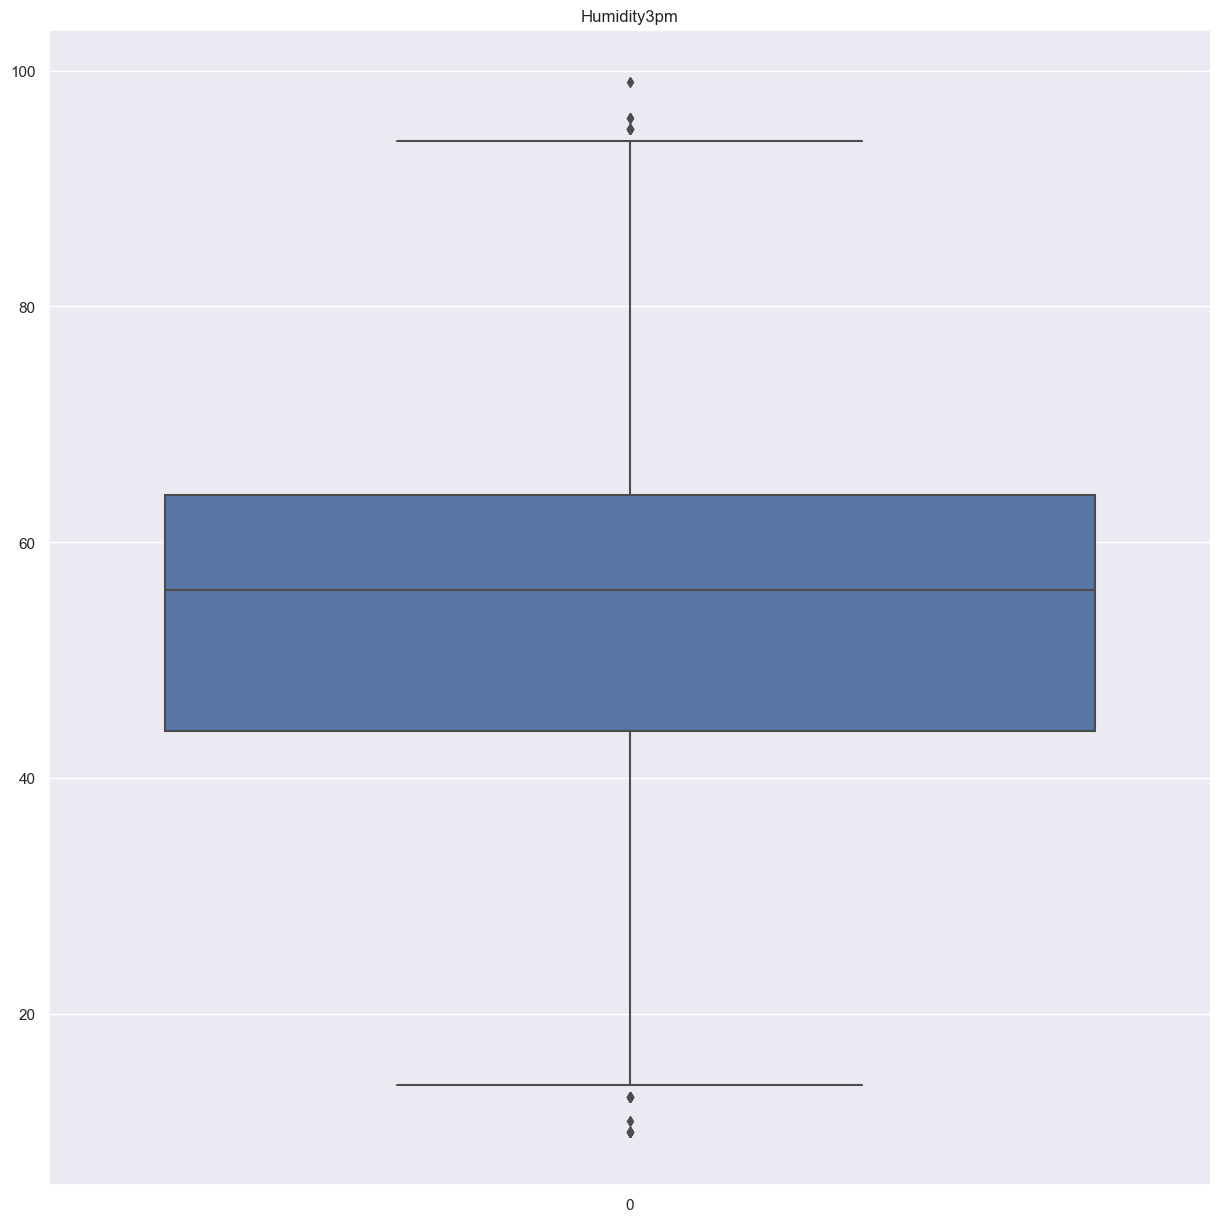

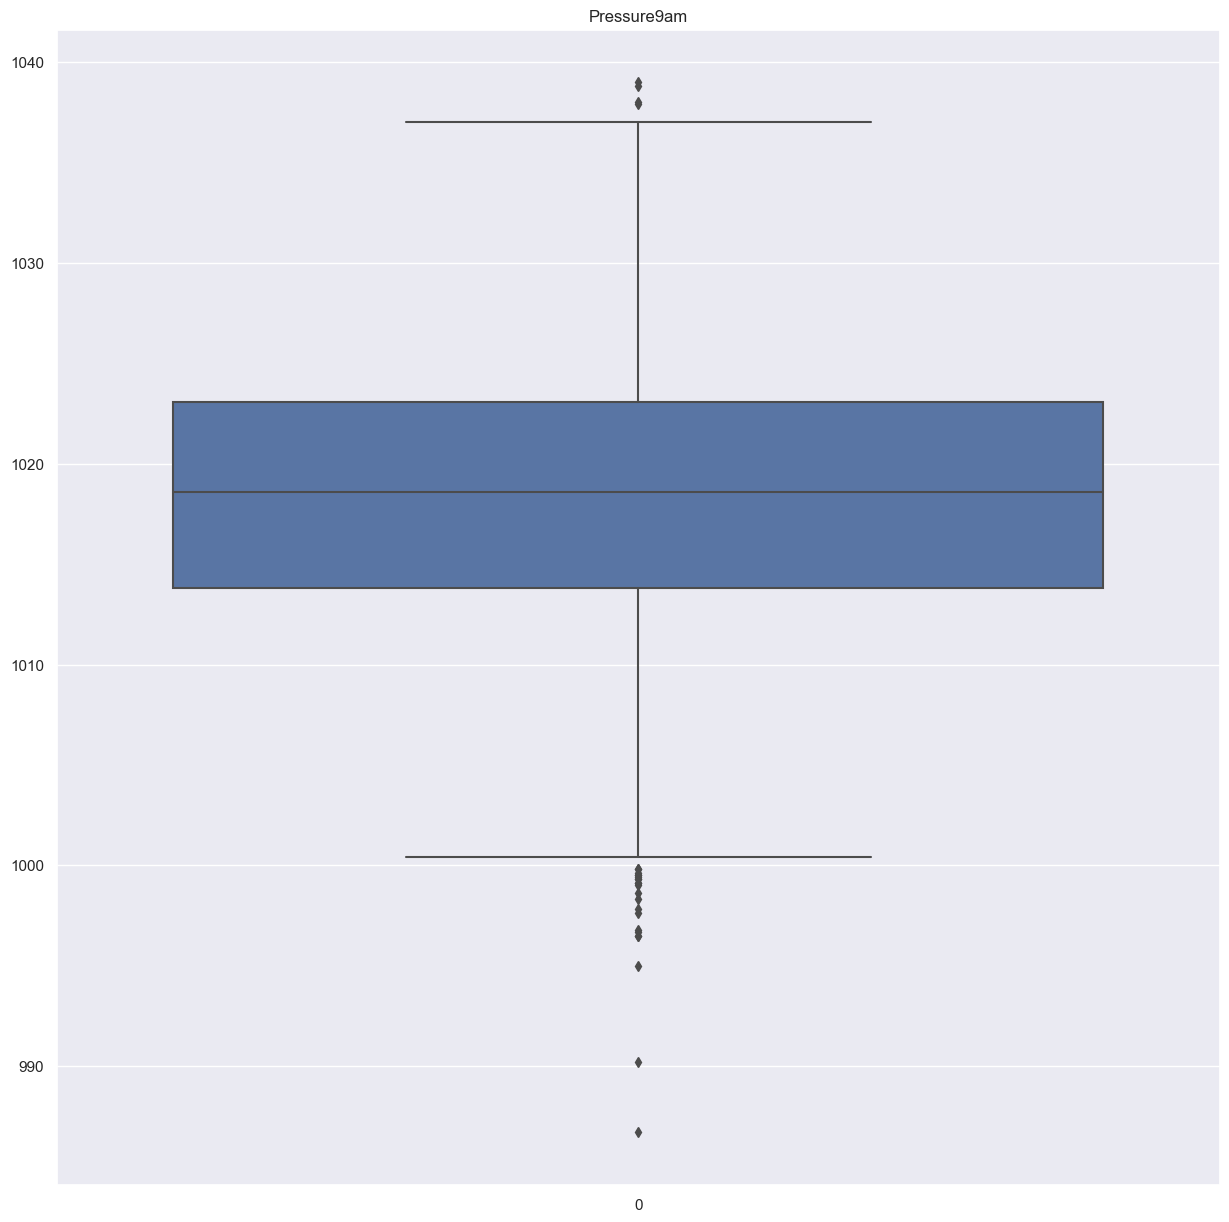

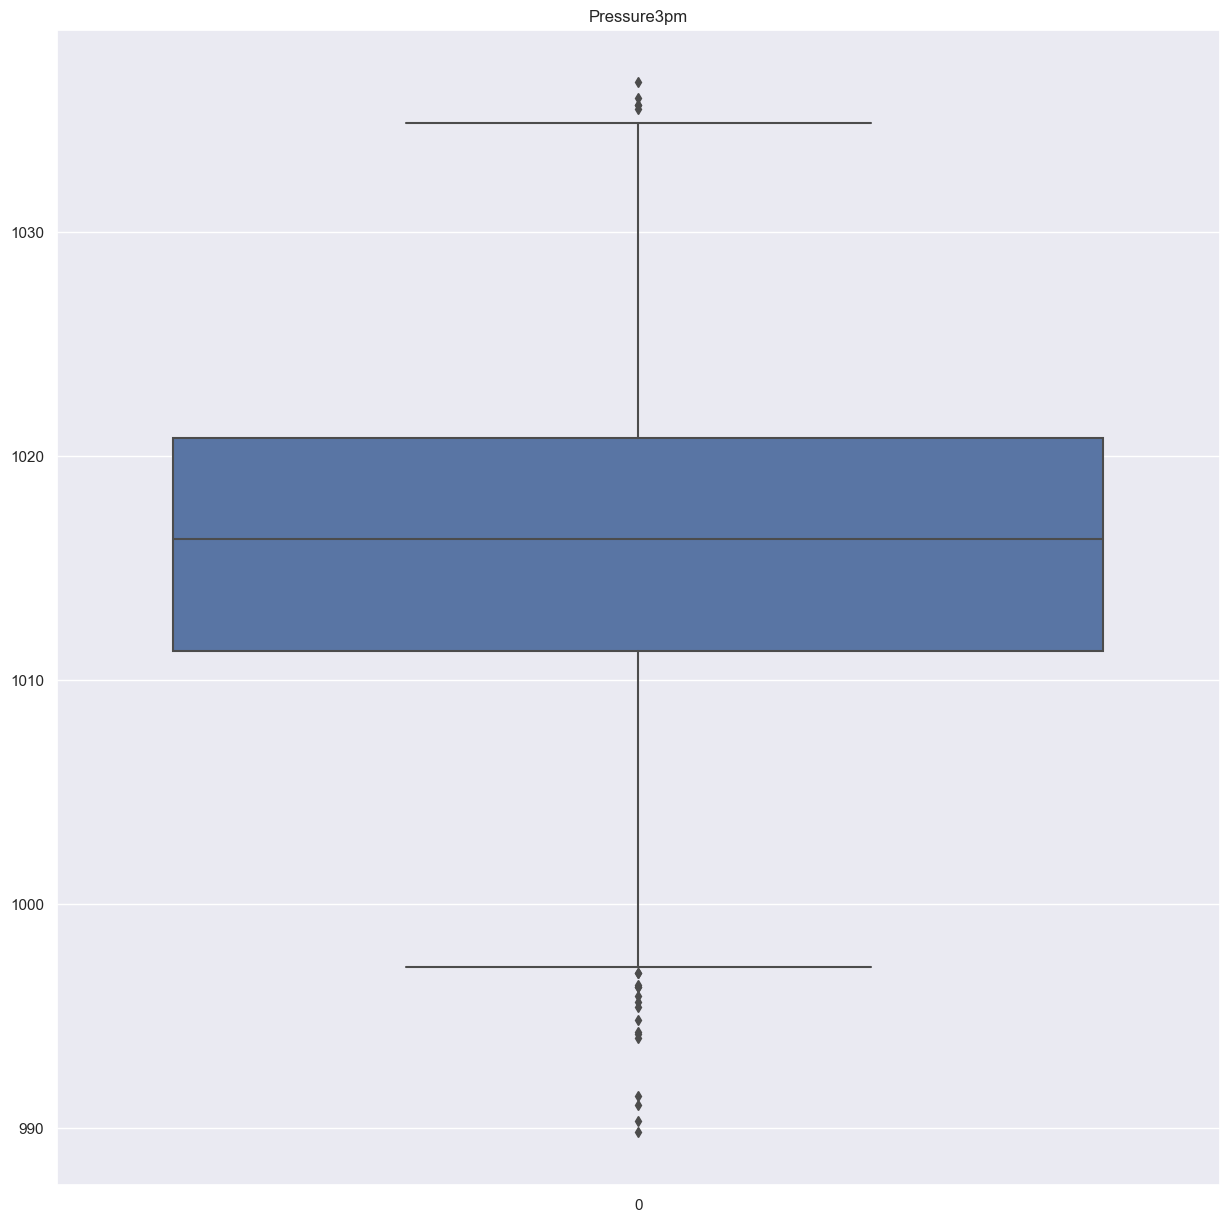

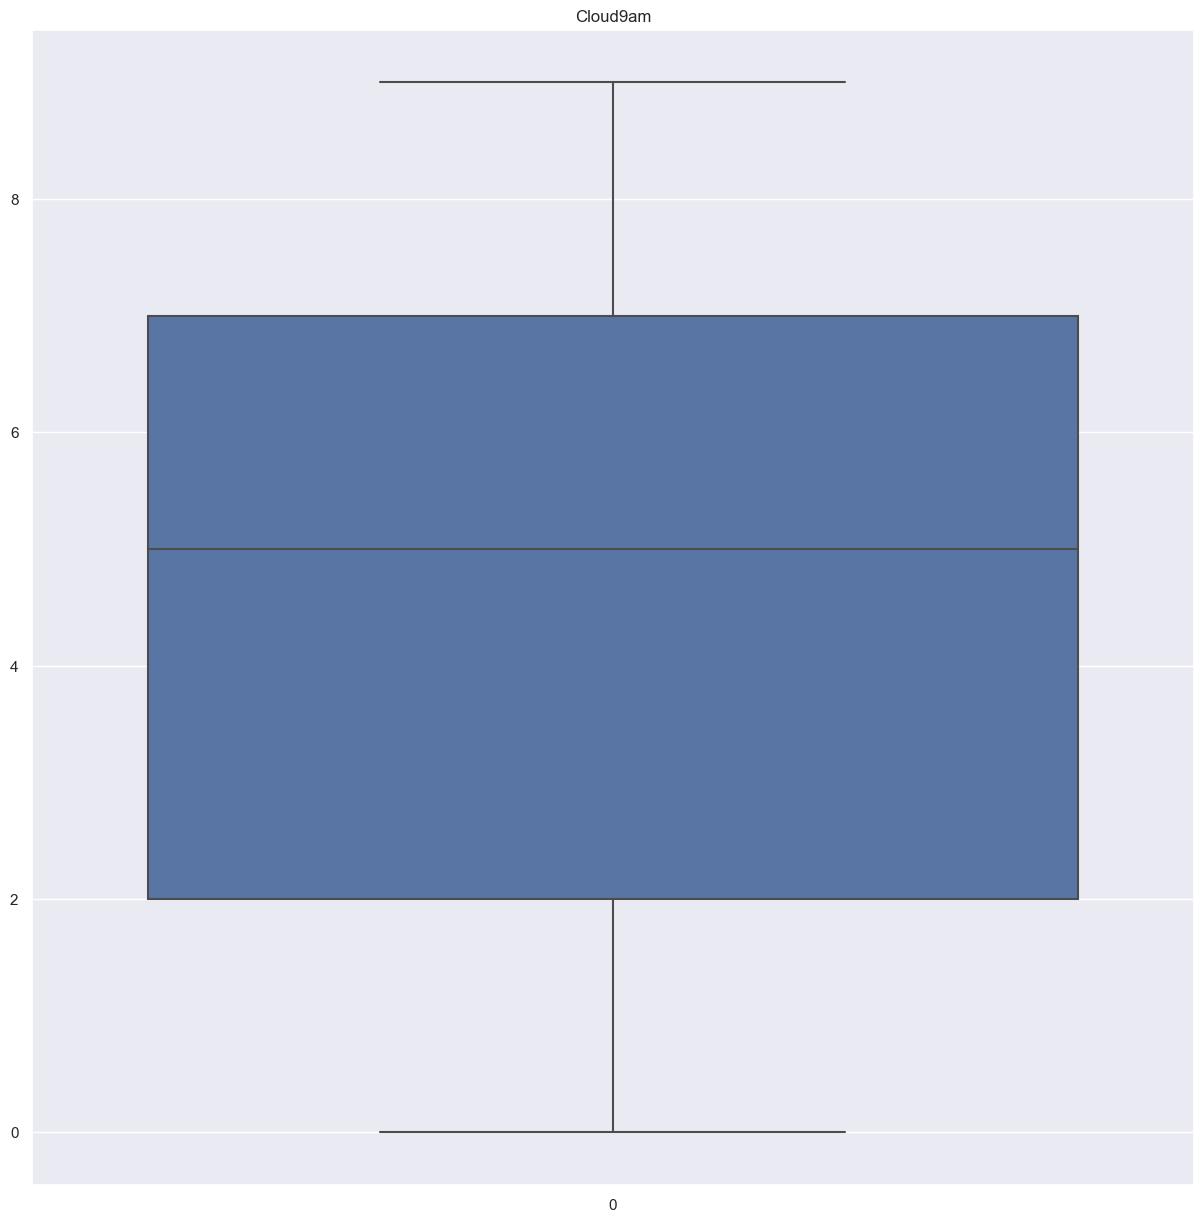

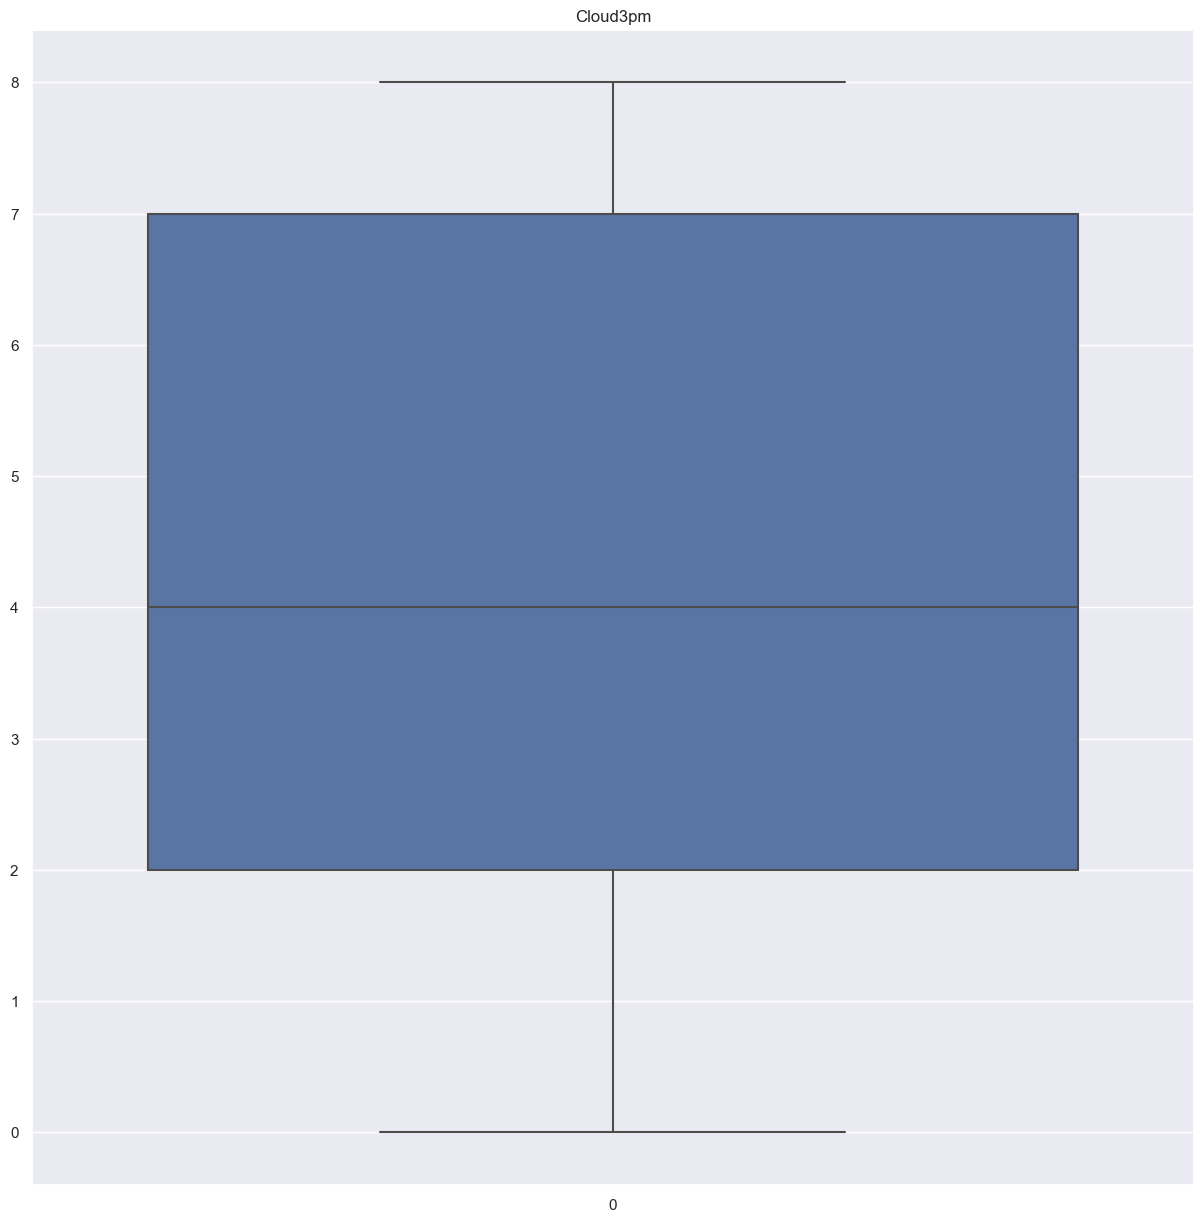

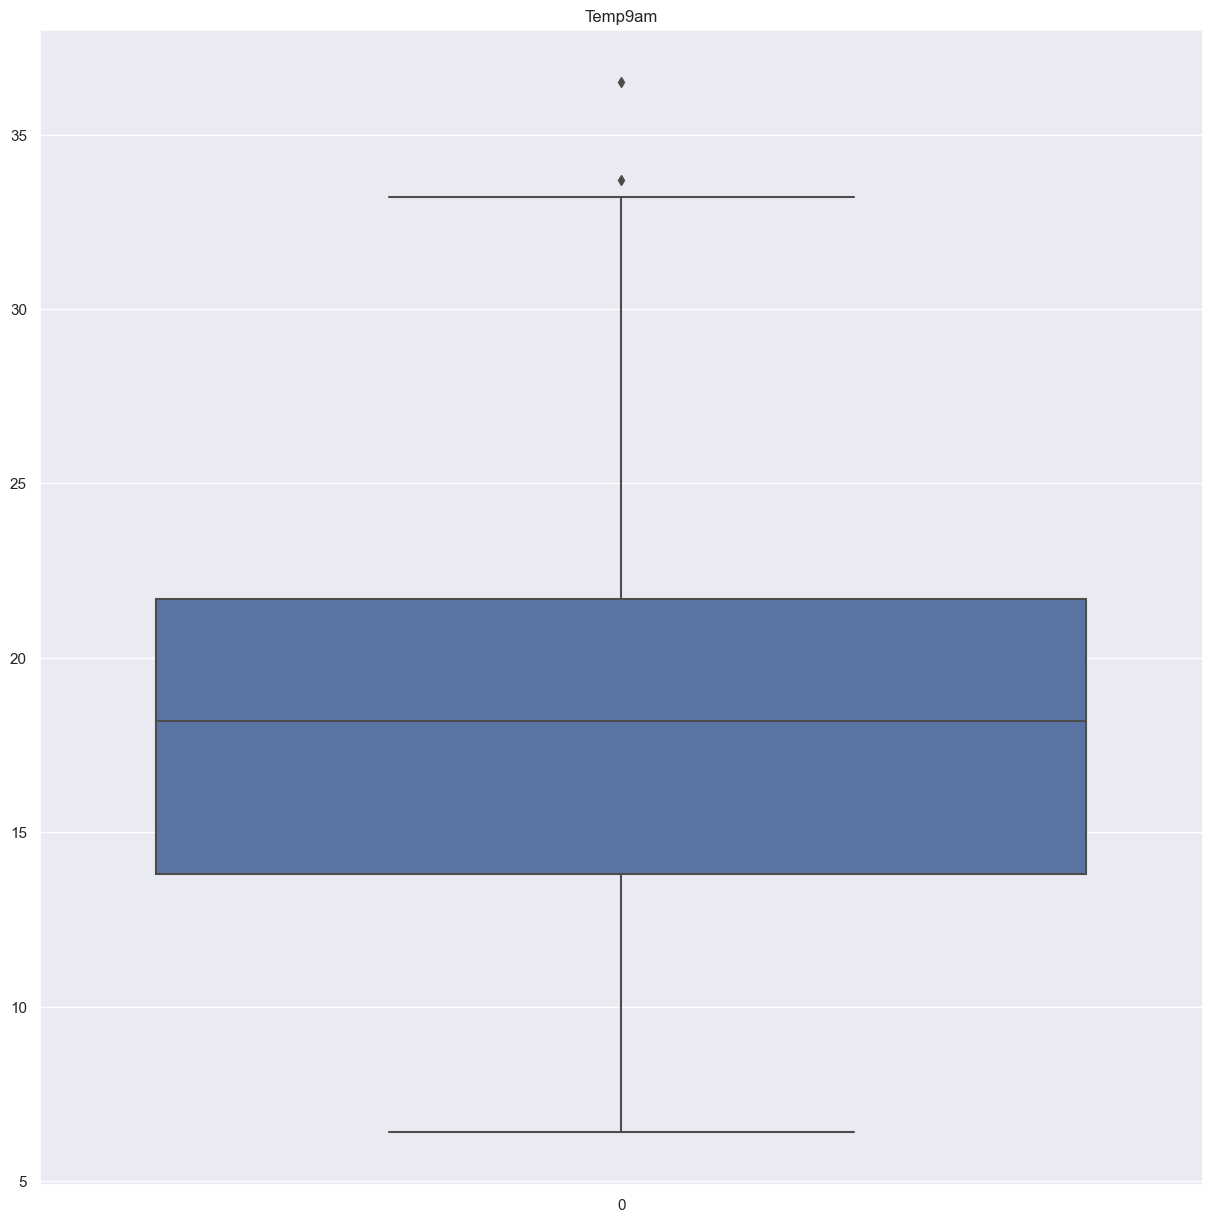

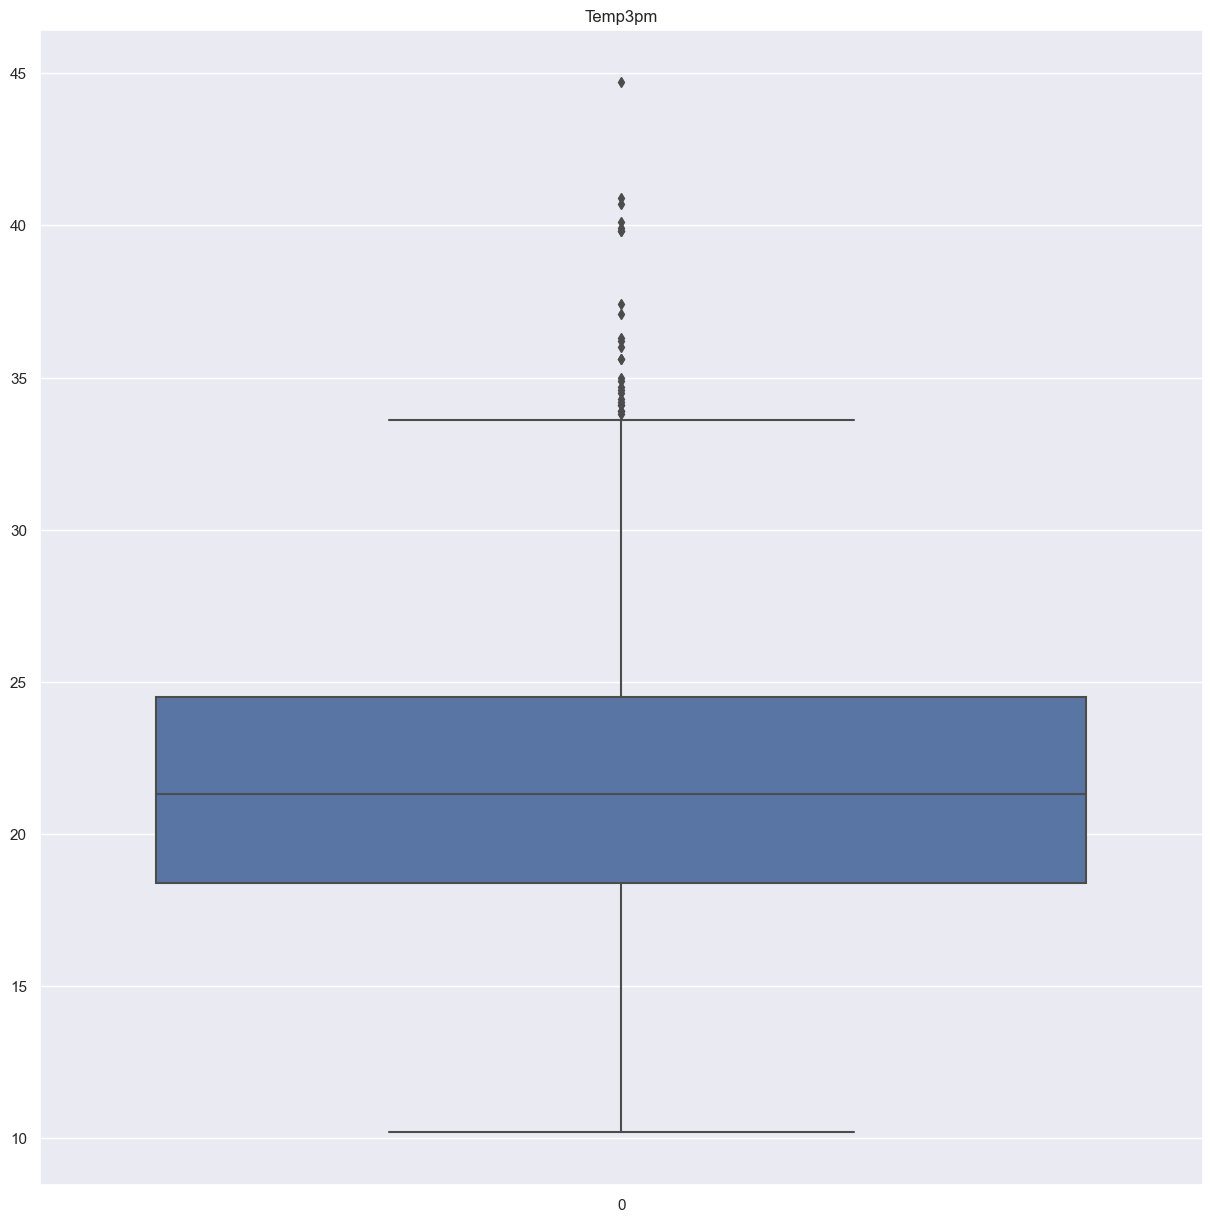

<Figure size 1500x1500 with 0 Axes>

In [13]:
# Plotting the boxplot using seaborn library for outlier indentification in each column variable.

for feature in numerical_columns:
    data = df.copy()
    sns.boxplot(data[feature])      # Using boxplot for checking the distribution of each attribute to find outliers.
    plt.title(feature)
    plt.figure(figsize = (15,15))

### Observation:
#### Through the EDD and boxplots of the given data set we can find that there are  few variables with outliers and therefore we need to treat them before proceeding any further.

In [14]:
# Finding the outlier in MaxTemp column variable using Inter Quartile Range (IQR) formula.

IQR = df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_limit = df.MaxTemp.quantile(0.25) - (IQR * 1.5)   # The lower limit value equals Q1 - 1.5 * (IQR)
upper_limit = df.MaxTemp.quantile(0.75) + (IQR * 1.5)   # The upper limit value equals Q3 + 1.5 * (IQR)

print(lower_limit, upper_limit)

10.000000000000004 35.599999999999994


In [15]:
# Clipping the values of 'MaxTemp' column in the DataFrame, 'df'.
# - Values greater than or equal to 35.5999 will be set to 35.5999.
# - Values less than or equal to 10 will be set to 10.

df.loc[df['MaxTemp'] >= 35.5999, 'MaxTemp'] = 35.5999
df.loc[df['MaxTemp'] <= 10,'MaxTemp'] = 10

### Formulae Used:

**Inter Quartile Range (IQR)**

- IQR = Q3 - Q1;  where Q1 and Q3 are first and third quartiles respectively


**The lower limit and upper limit of a data set are given by:**

- Lower limit = Q1 - 1.5  IQR

- Upper limit = Q3 + 1.5  IQR

In [16]:
# Find the outlier in Rainfall column variable using IQR formula.

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
lower_limit = df.Rainfall.quantile(0.25) - (IQR * 1.5)
upper_limit = df.Rainfall.quantile(0.75) + (IQR * 1.5)

print(lower_limit, upper_limit)

-2.0999999999999996 3.4999999999999996


In [17]:
# Clip the values of 'Rainfall' column in the DataFrame 'df'
# Values greater than or equal to 3.4999 will be set to 3.4999
# Values less than or equal to -2.099 will be set to -2.099

df.loc[df['Rainfall'] >= 3.4999,'Rainfall'] = 3.4999
df.loc[df['Rainfall'] <= -2.099,'Rainfall'] = -2.099

In [18]:
# Find the outlier in Evaporation column variable using IQR formula.

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
lower_limit = df.Evaporation.quantile(0.25) - (IQR * 1.5)
upper_limit = df.Evaporation.quantile(0.75) + (IQR * 1.5)

print(lower_limit, upper_limit)

-2.499999999999999 12.7


In [19]:
# Clip the values of 'Evaporation' column in the DataFrame 'df'
# Values greater than or equal to 12.7 will be set to 12.7
# Values less than or equal to -2.4999 will be set to -2.499

df.loc[df['Evaporation'] >= 12.7,'Evaporation'] = 12.7
df.loc[df['Evaporation'] <= -2.4999,'Evaporation'] = -2.499

In [20]:
# Find the outlier in Humidity9am column variable using IQR formula.

IQR = df.Humidity9am.quantile(0.75) - df.Humidity9am.quantile(0.25)
lower_limit = df.Humidity9am.quantile(0.25) - (IQR*1.5)
upper_limit = df.Humidity9am.quantile(0.75) + (IQR*1.5)

print(lower_limit, upper_limit)

25.0 113.0


In [21]:
# Clip the values of 'Humidity9am' column in the DataFrame 'df'
# Values greater than or equal to 113 will be set to 113
# Values less than or equal to 25 will be set to 25

df.loc[df['Humidity9am'] >= 113,'Humidity9am'] = 113
df.loc[df['Humidity9am'] <= 25,'Humidity9am'] = 25

In [22]:
# Find the outlier in Humidity3pm column variable using IQR formula.

IQR = df.Humidity3pm.quantile(0.75) - df.Humidity3pm.quantile(0.25)
lower_limit = df.Humidity3pm.quantile(0.25) - (IQR * 1.5)
upper_limit = df.Humidity3pm.quantile(0.75) + (IQR * 1.5)

print(lower_limit, upper_limit)

14.0 94.0


In [23]:
# Clip the values of 'Humidity3pm' column in the DataFrame 'df'
# Values greater than or equal to 94 will be set to 94
# Values less than or equal to 14 will be set to 14

df.loc[df['Humidity3pm'] >= 94,'Humidity3pm'] = 94
df.loc[df['Humidity3pm'] <= 14,'Humidity3pm'] = 14

In [24]:
# Find the outlier in Pressure9am column variable using IQR formula.

IQR = df.Pressure9am.quantile(0.75) - df.Pressure9am.quantile(0.25)
lower_limit=df.Pressure9am.quantile(0.25) - (IQR * 1.5)
upper_limit=df.Pressure9am.quantile(0.75) + (IQR * 1.5)

print(lower_limit, upper_limit)

999.8499999999999 1037.0500000000002


In [25]:
# Clip the values of 'Pressure9am' column in the DataFrame 'df'
# Values greater than or equal to 1037.05 will be set to 1037.05
# Values less than or equal to 999.84 will be set to 999.84

df.loc[df['Pressure9am'] >= 1037.05,'Pressure9am'] = 1037.05
df.loc[df['Pressure9am'] <= 999.84,'Pressure9am'] = 999.84

In [26]:
# Find the outlier in Pressure3pm column variable using IQR formula.

IQR = df.Pressure3pm.quantile(0.75) - df.Pressure3pm.quantile(0.25)
lower_limit = df.Pressure3pm.quantile(0.25) - (IQR * 1.5)
upper_limit = df.Pressure3pm.quantile(0.75)+(IQR * 1.5)
print(lower_limit, upper_limit)

997.05 1035.05


In [27]:
# Clip the values of 'Pressure3pm' column in the DataFrame 'df'
# Values greater than or equal to 1035.05 will be set to 1035.05
# Values less than or equal to 997.05 will be set to 997.05

df.loc[df['Pressure3pm'] >= 1035.05,'Pressure3pm'] = 1035.05
df.loc[df['Pressure3pm'] <= 997.05,'Pressure3pm'] = 997.05

In [28]:
# Find the outlier in Temp9am column variable using IQR formula.

IQR = df.Temp9am.quantile(0.75) - df.Temp9am.quantile(0.25)
lower_limit = df.Temp9am.quantile(0.25) - (IQR * 1.5)
upper_limit = df.Temp9am.quantile(0.75) + (IQR * 1.5)

print(lower_limit, upper_limit)

1.9500000000000028 33.55


In [29]:
# Clip the values of 'Temp9am' column in the DataFrame 'df'
# Values greater than or equal to 33.55 will be set to 33.55
# Values less than or equal to 1.95 will be set to 1.95

df.loc[df['Temp9am'] >= 33.55,'Temp9am'] = 33.55
df.loc[df['Temp9am'] <= 1.95,'Temp9am'] = 1.95

In [30]:
# Find the outlier in Temp3pm column variable using IQR formula.

IQR = df.Temp3pm.quantile(0.75) - df.Temp3pm.quantile(0.25)
lower_limit = df.Temp3pm.quantile(0.25) - (IQR*1.5)
upper_limit = df.Temp3pm.quantile(0.75) + (IQR*1.5)

print(lower_limit, upper_limit)

9.249999999999996 33.650000000000006


In [31]:
# Clip the values of 'Temp3pm' column in the DataFrame 'df'
# Values greater than or equal to 33.65 will be set to 33.65
# Values less than or equal to 9.249 will be set to 9.249

df.loc[df['Temp3pm'] >= 33.65,'Temp3pm'] = 33.65
df.loc[df['Temp3pm'] <= 9.249,'Temp3pm'] = 9.249

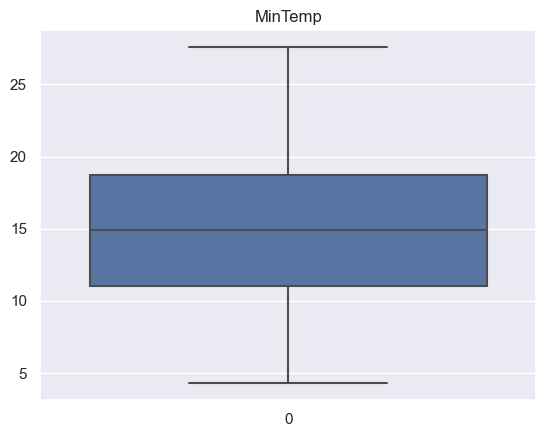

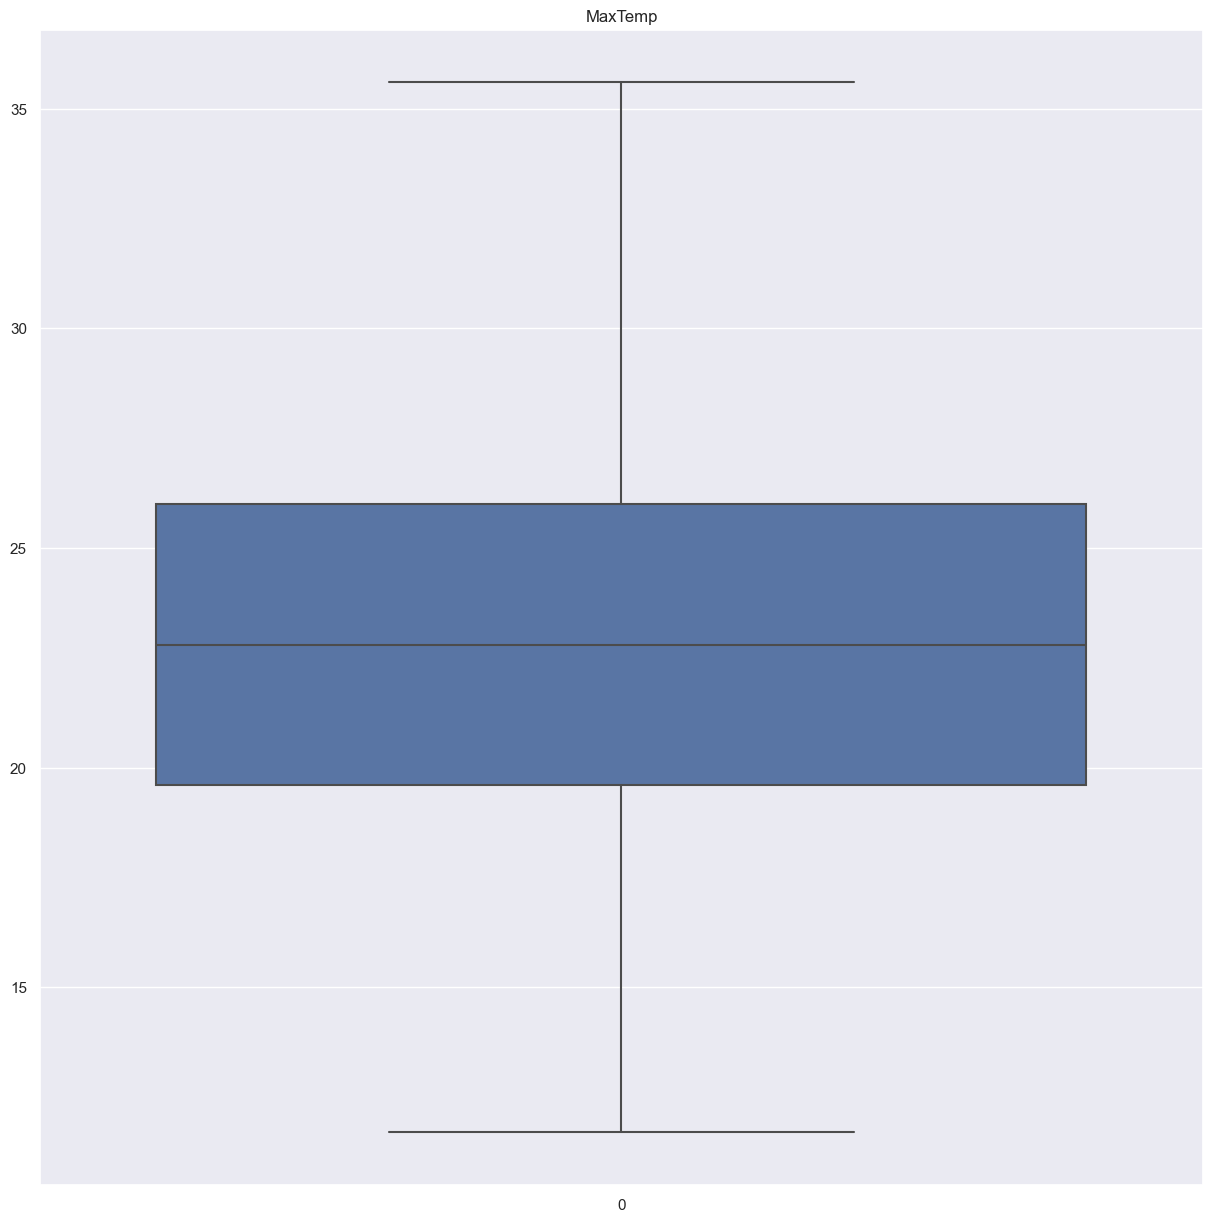

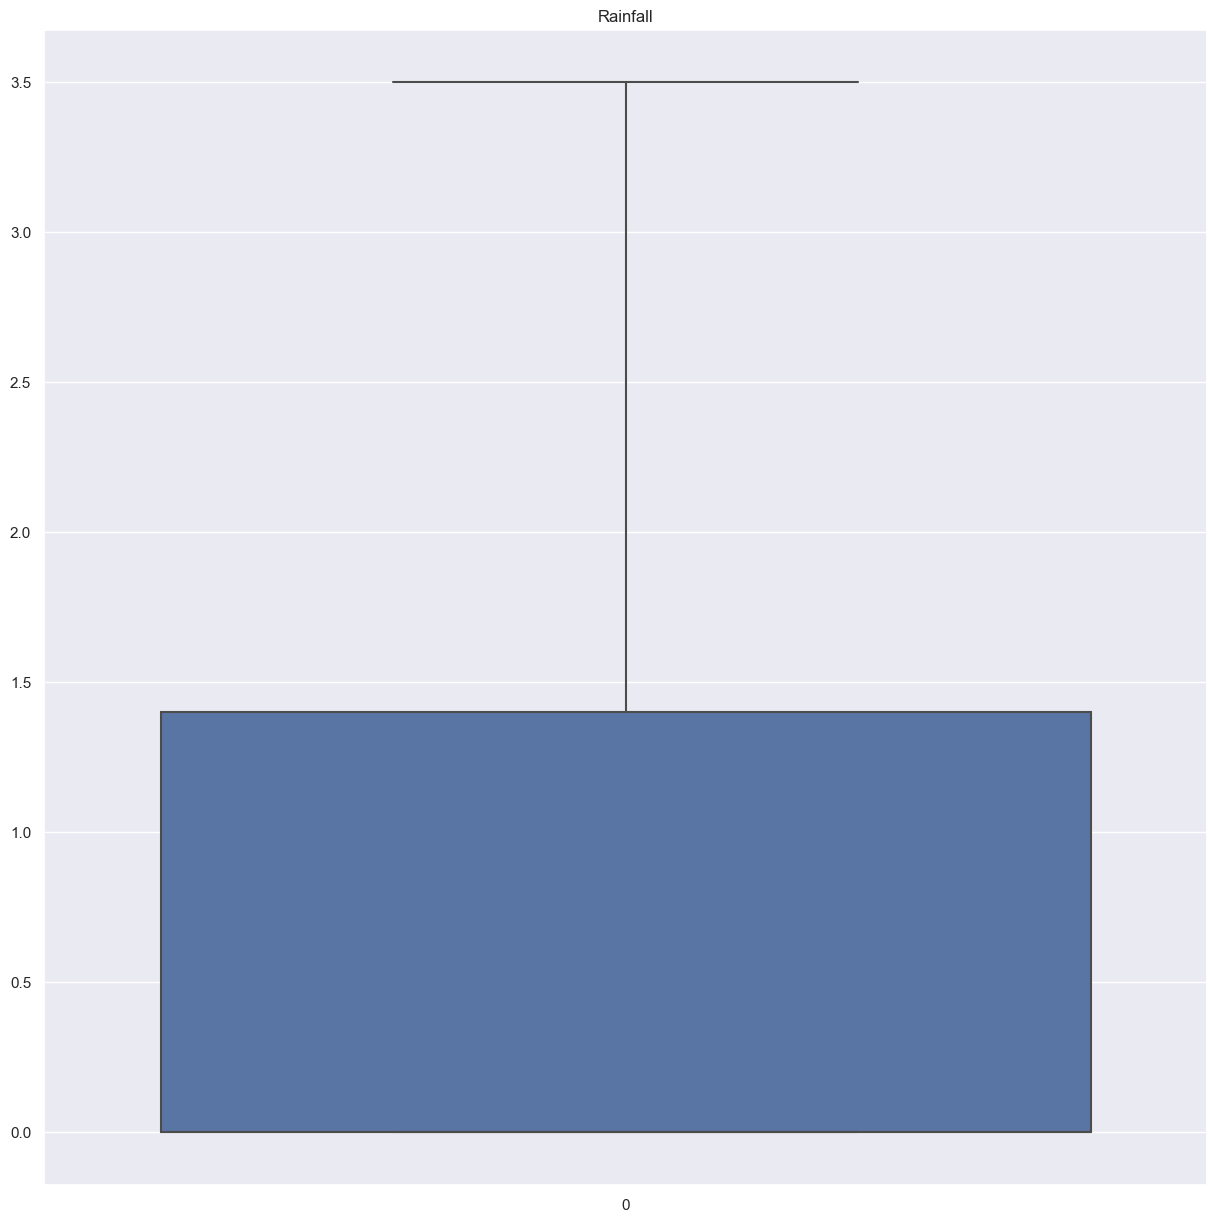

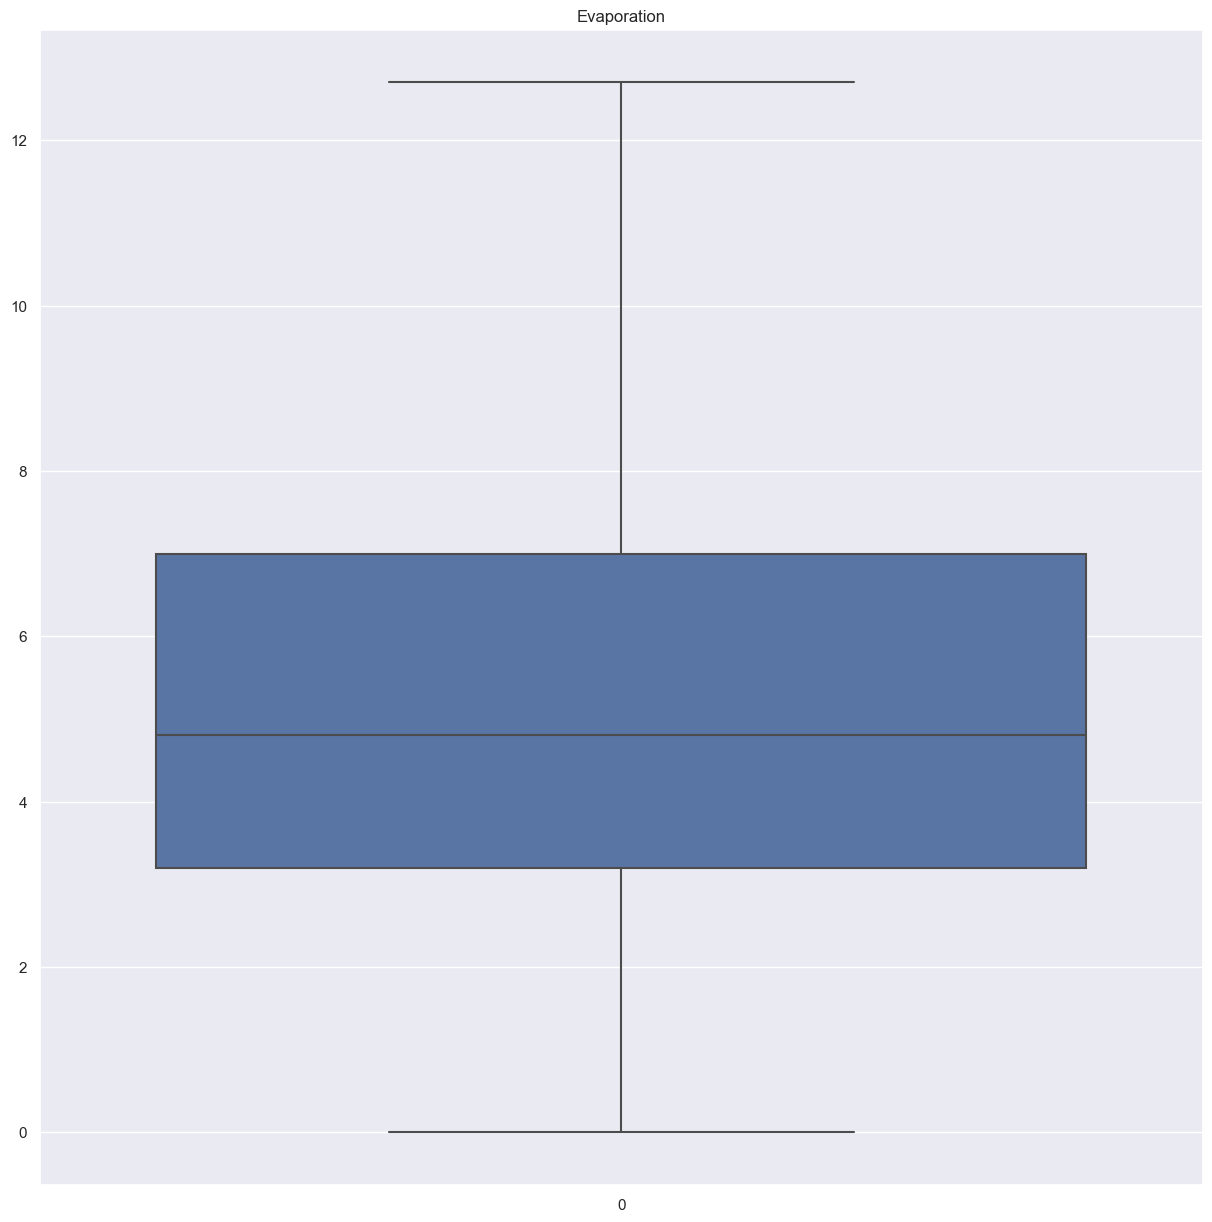

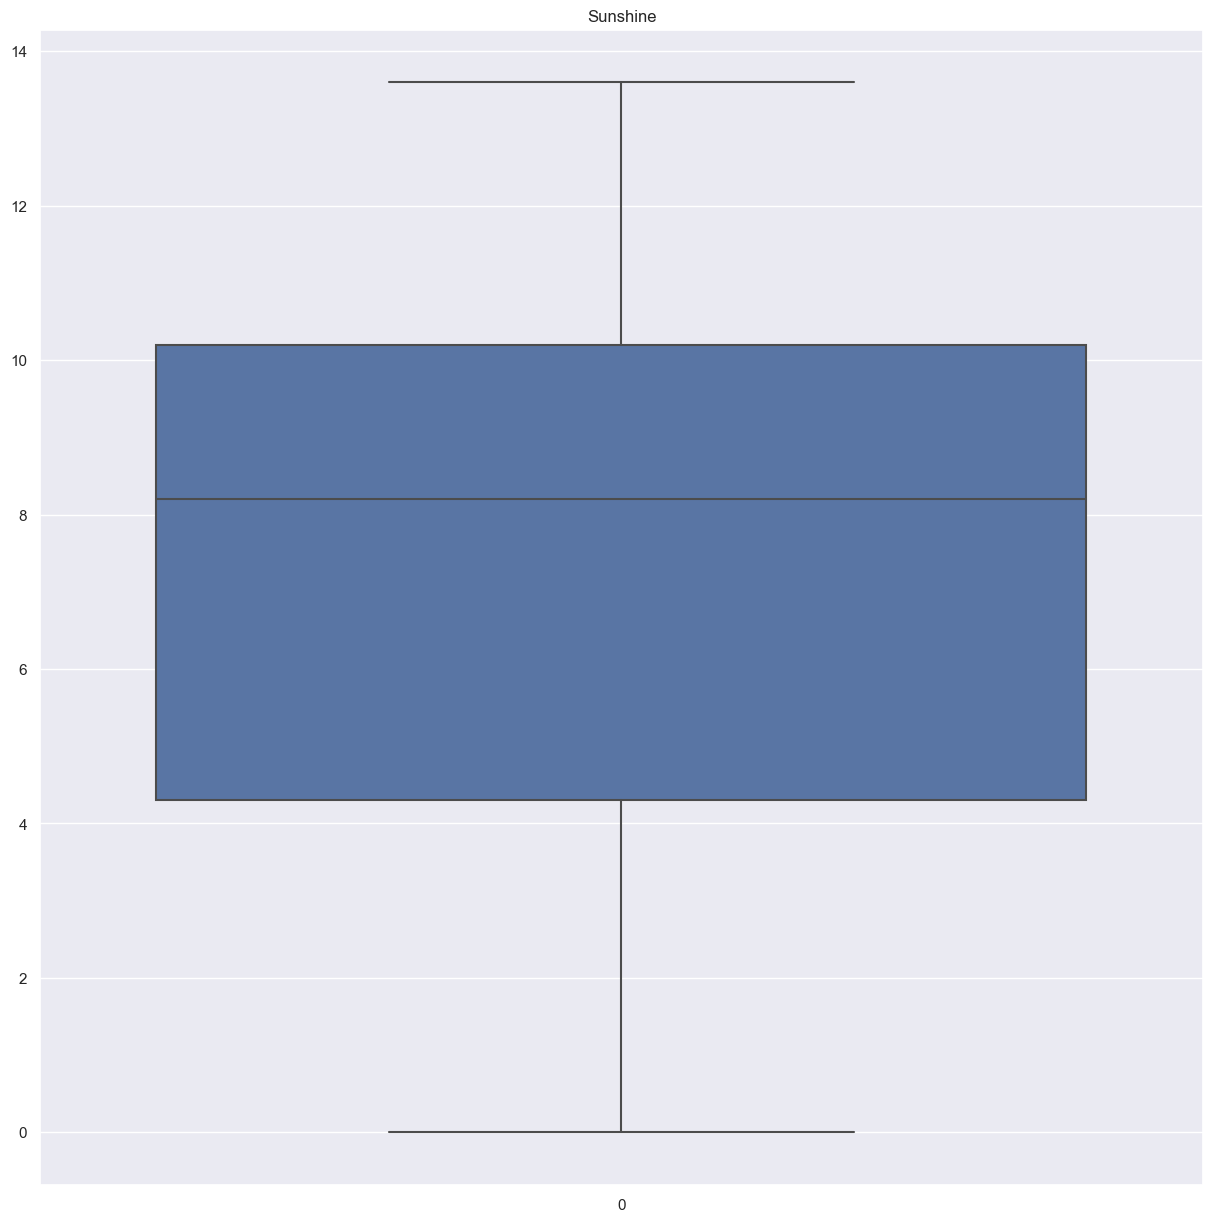

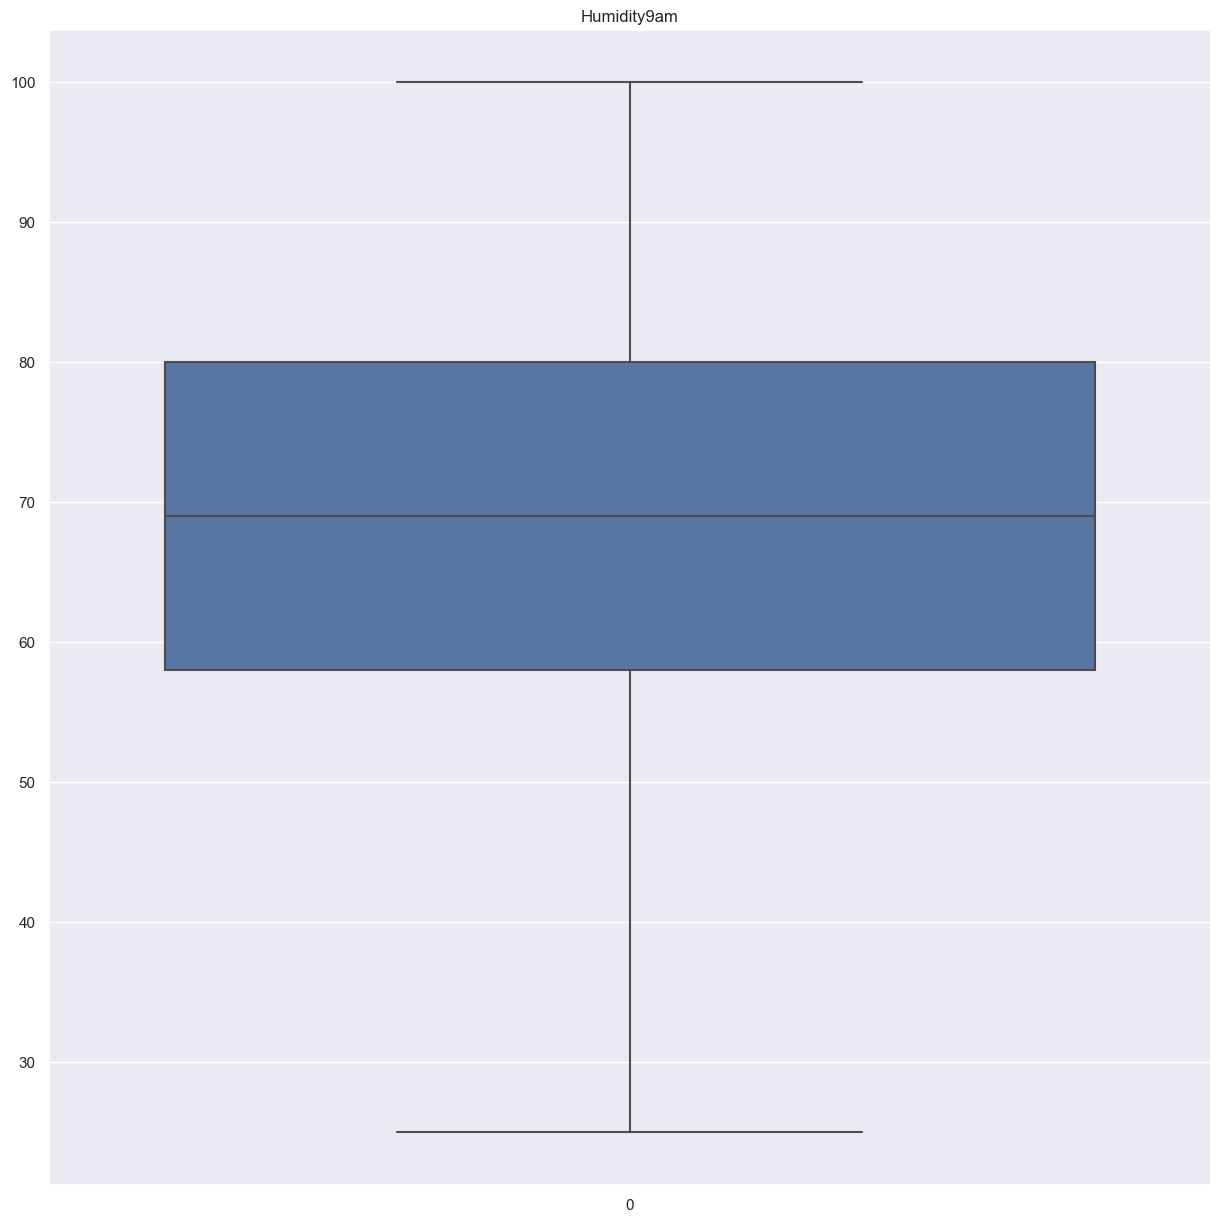

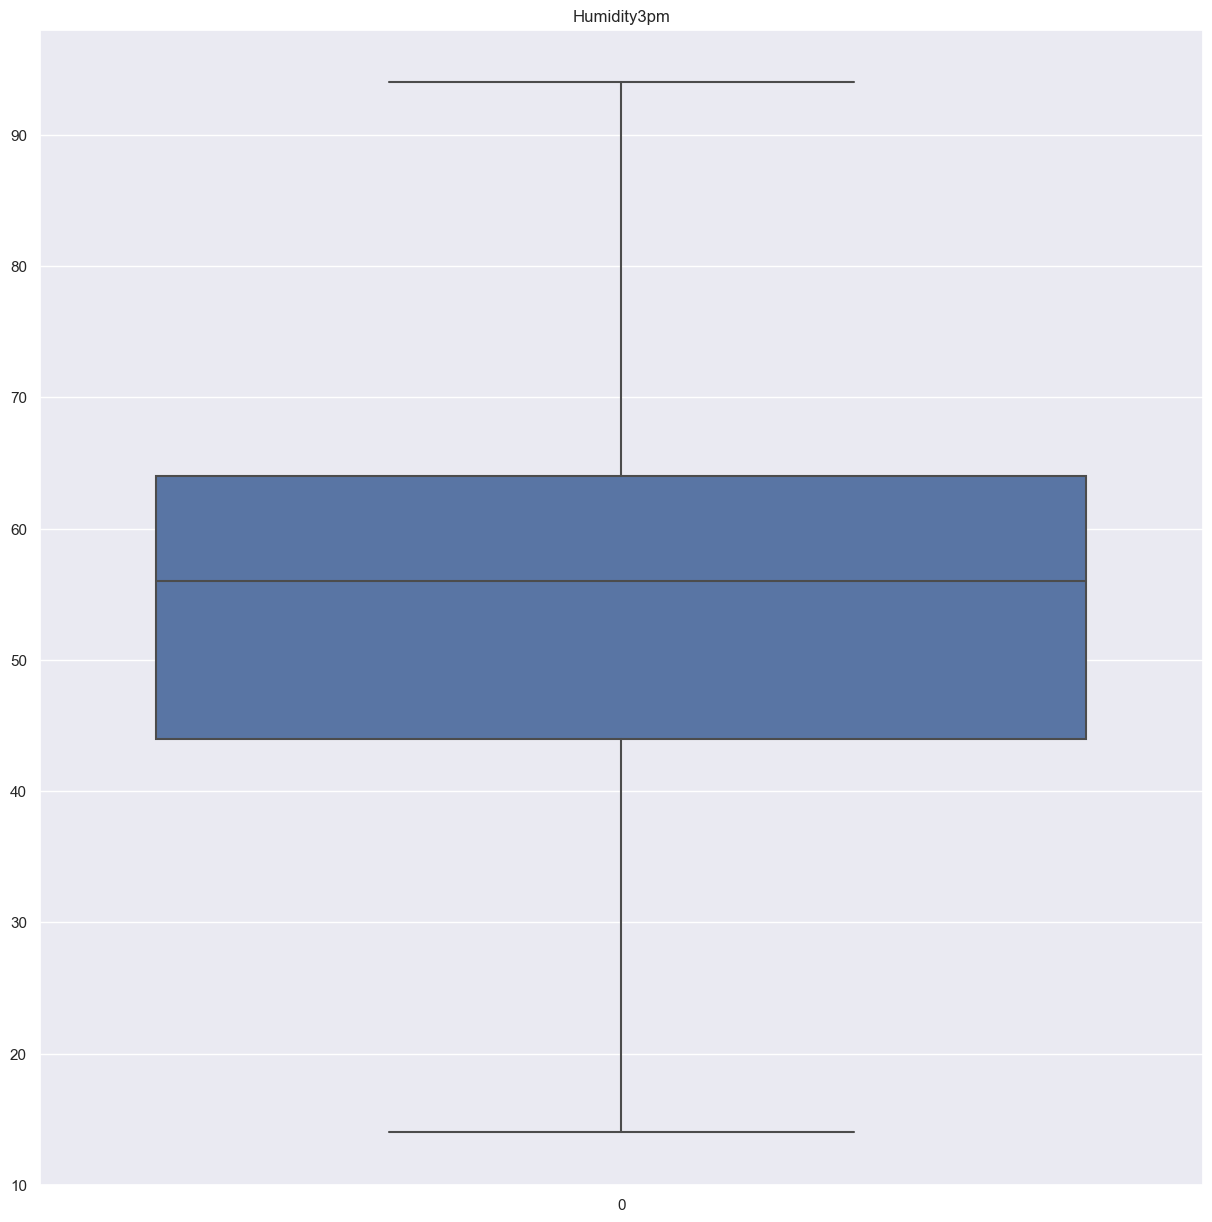

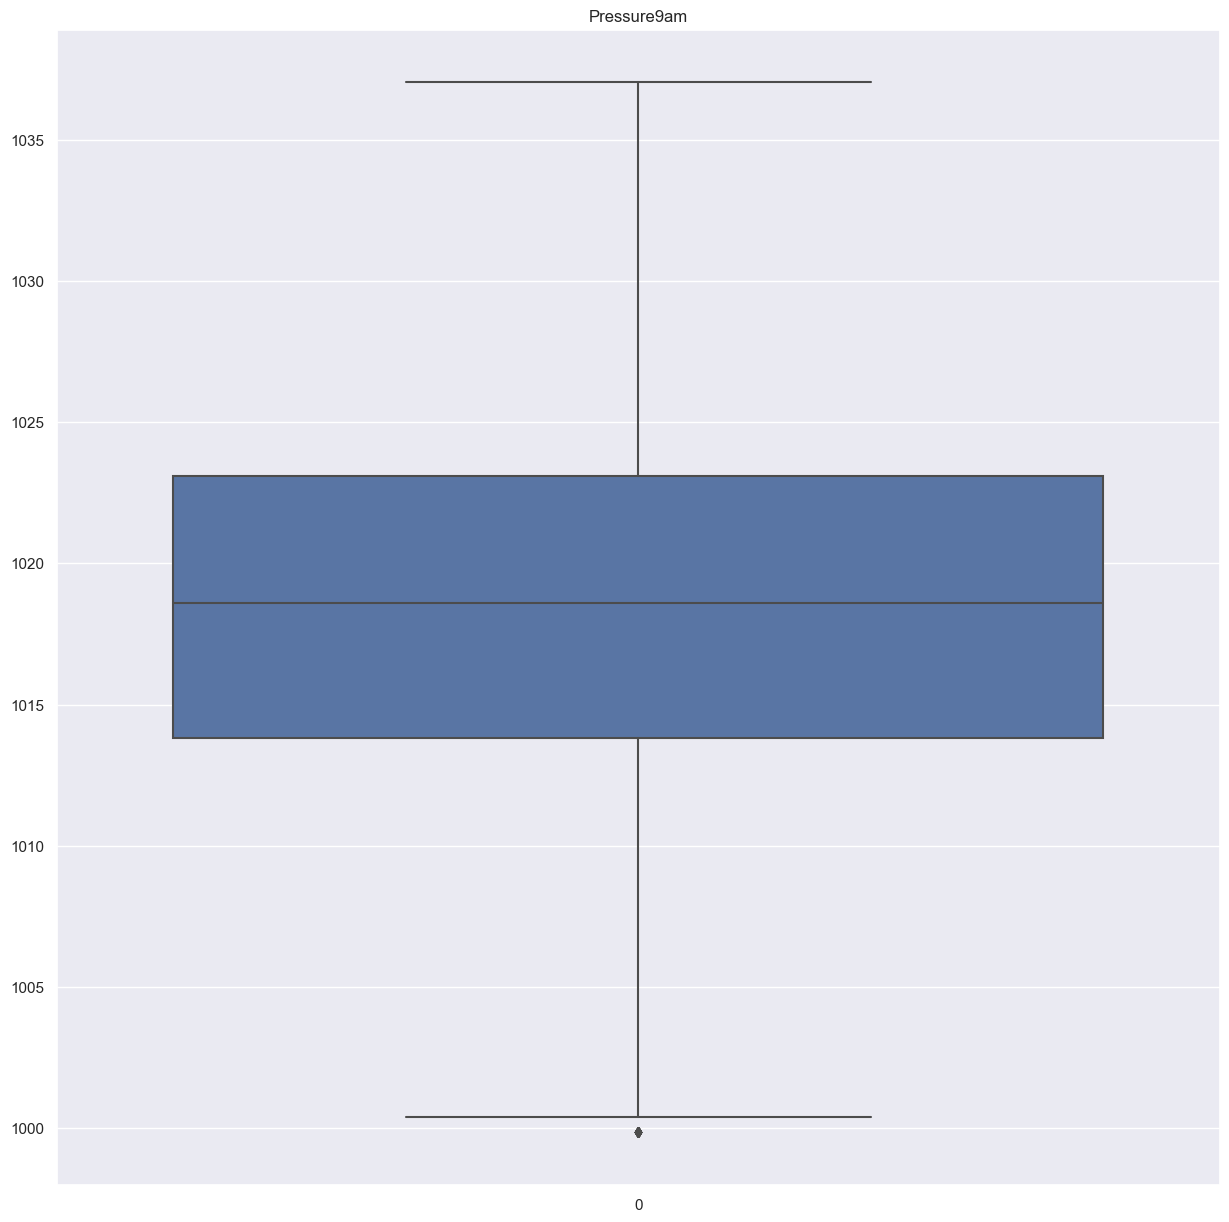

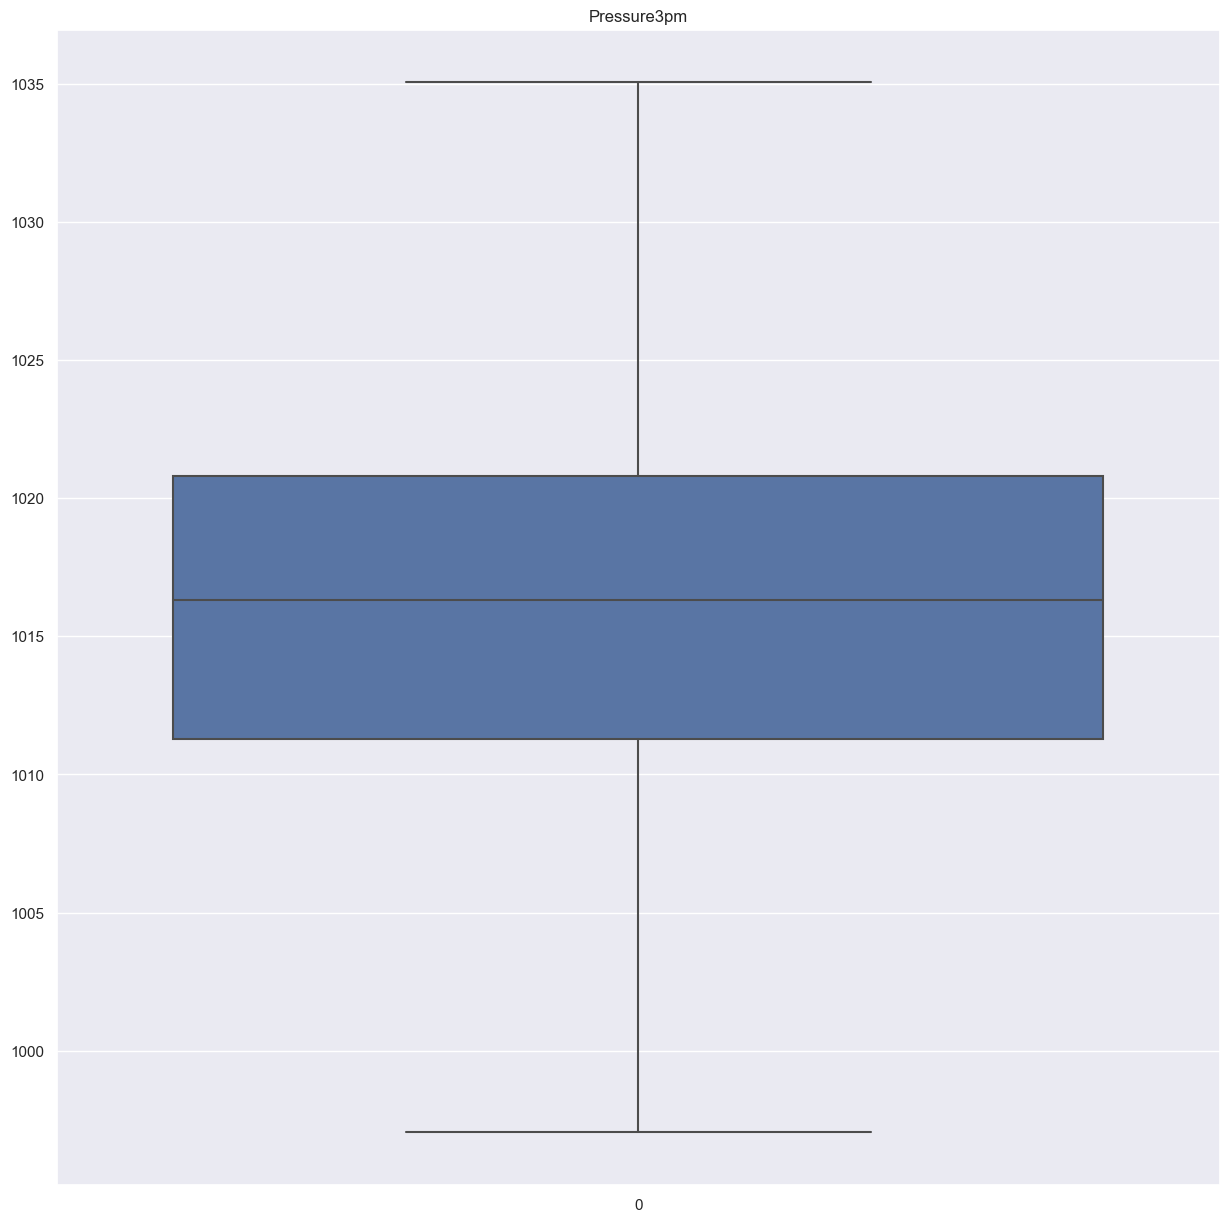

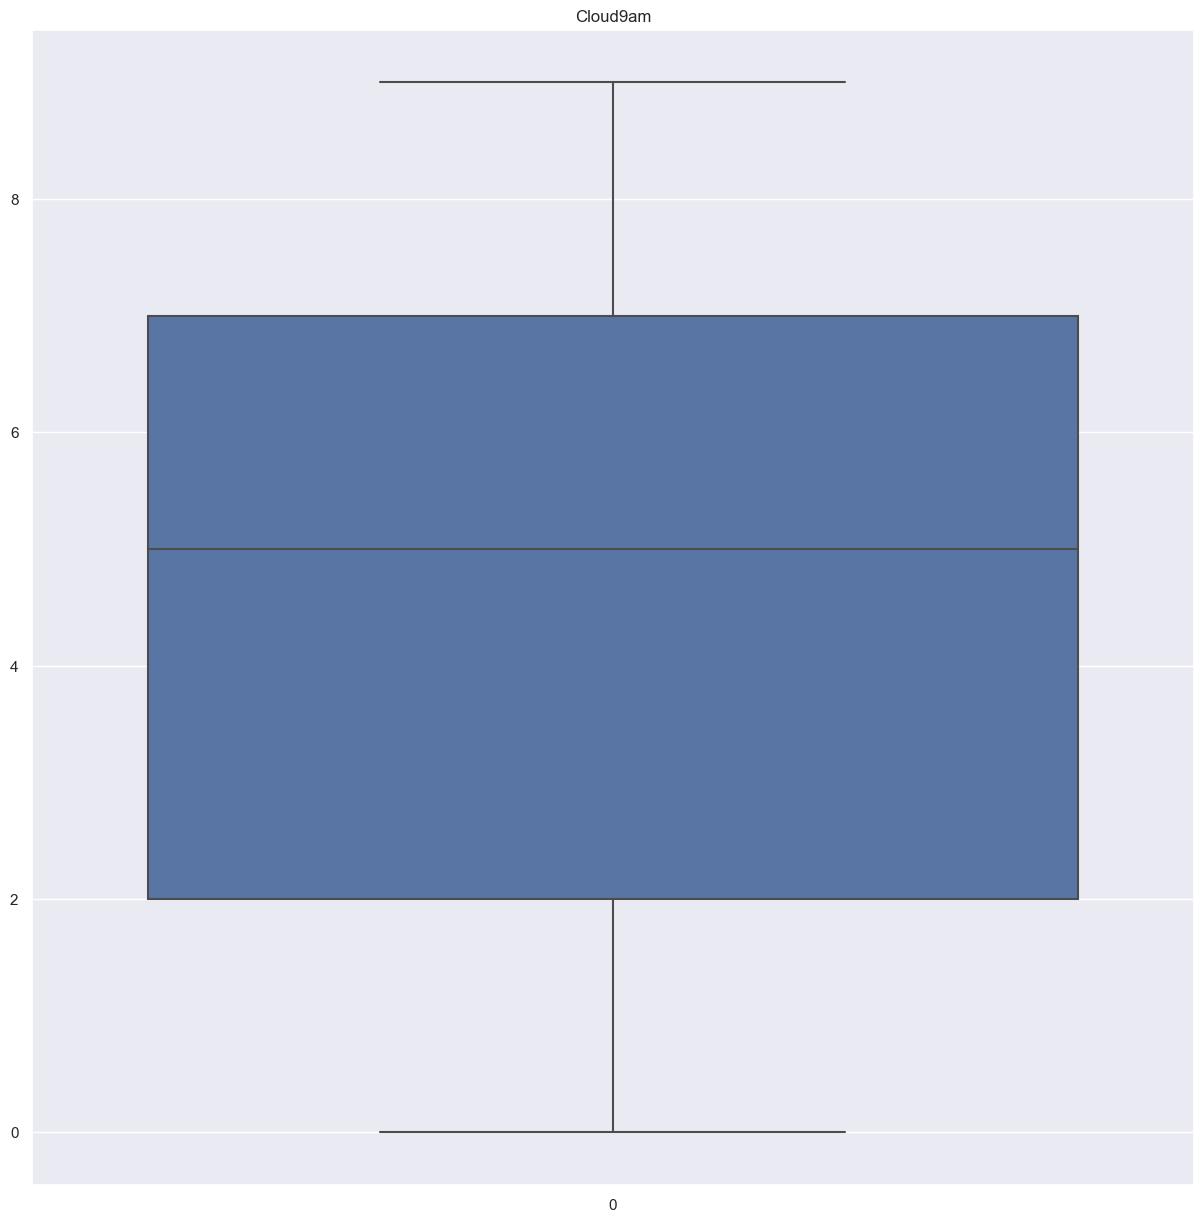

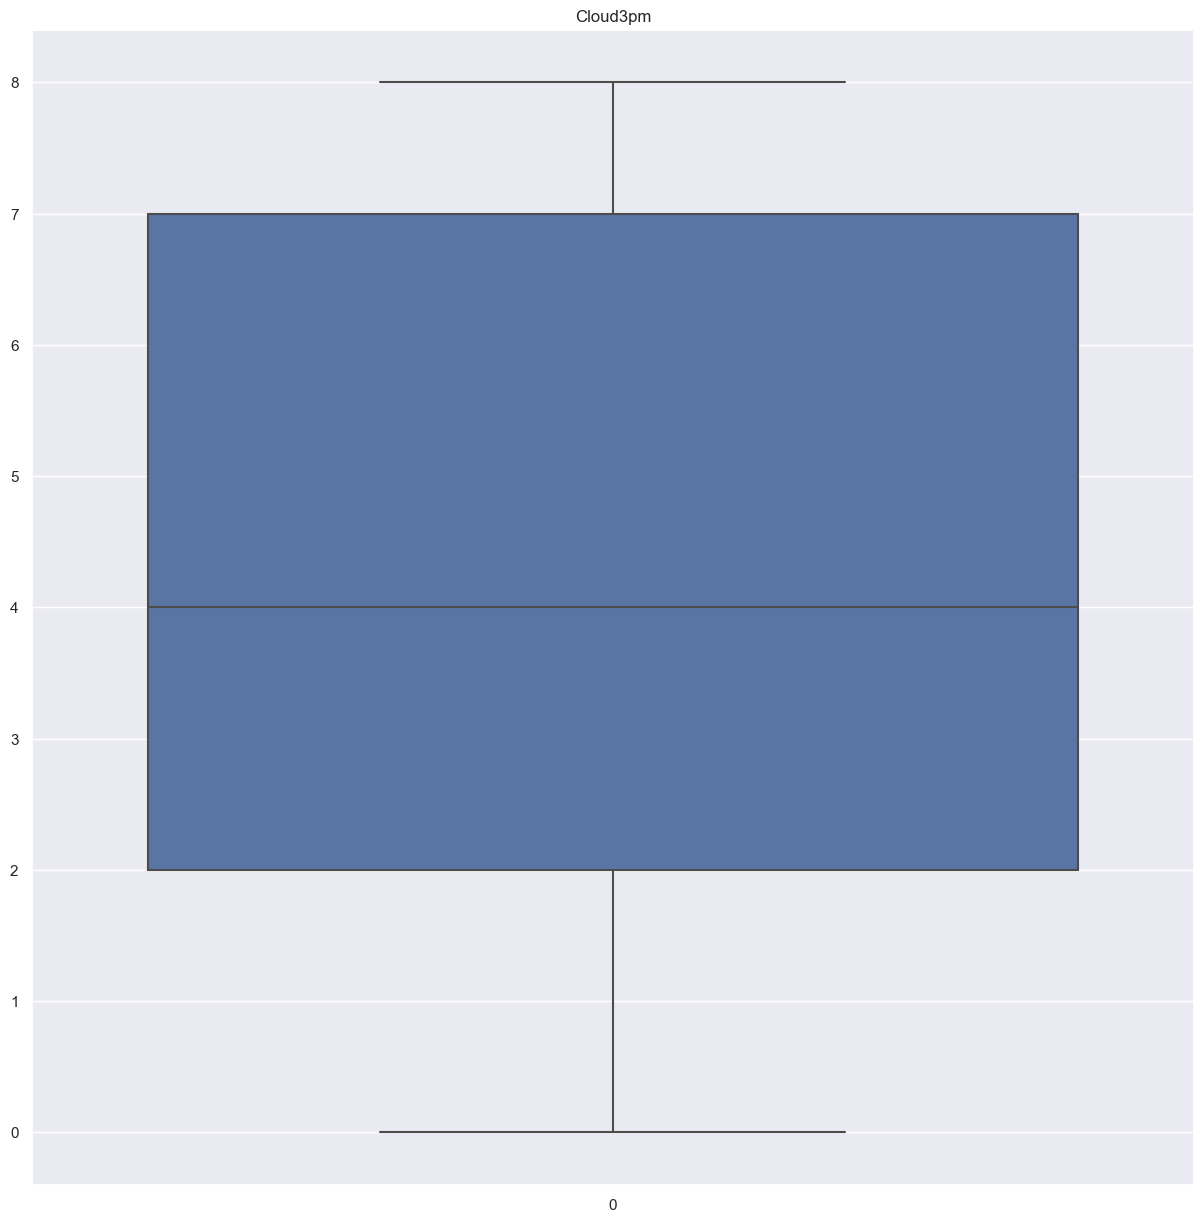

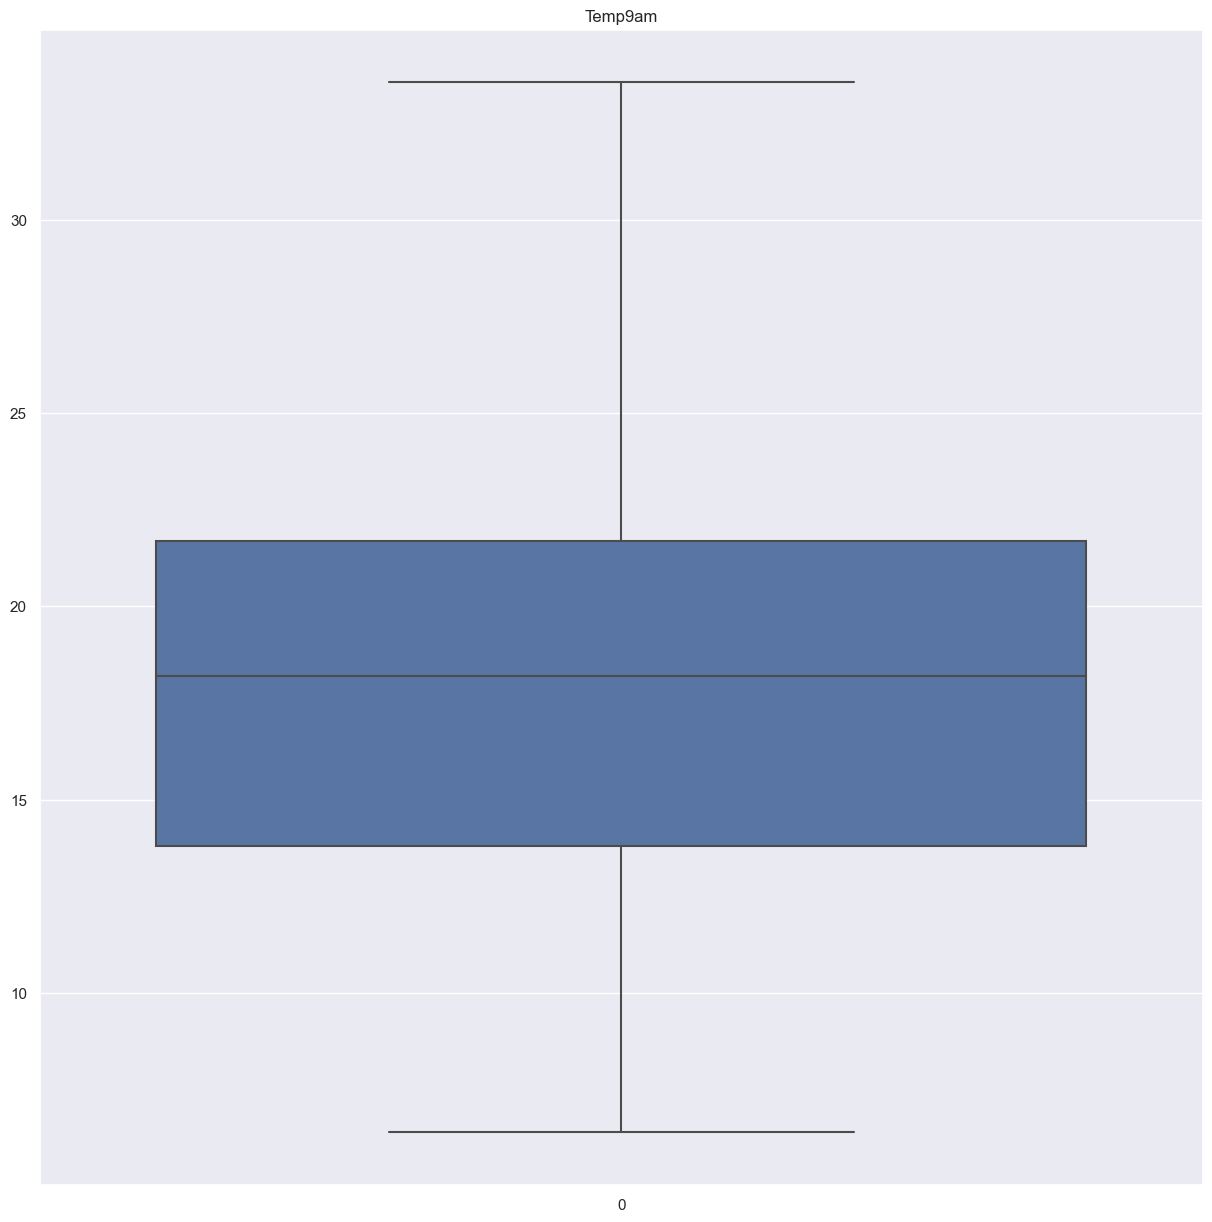

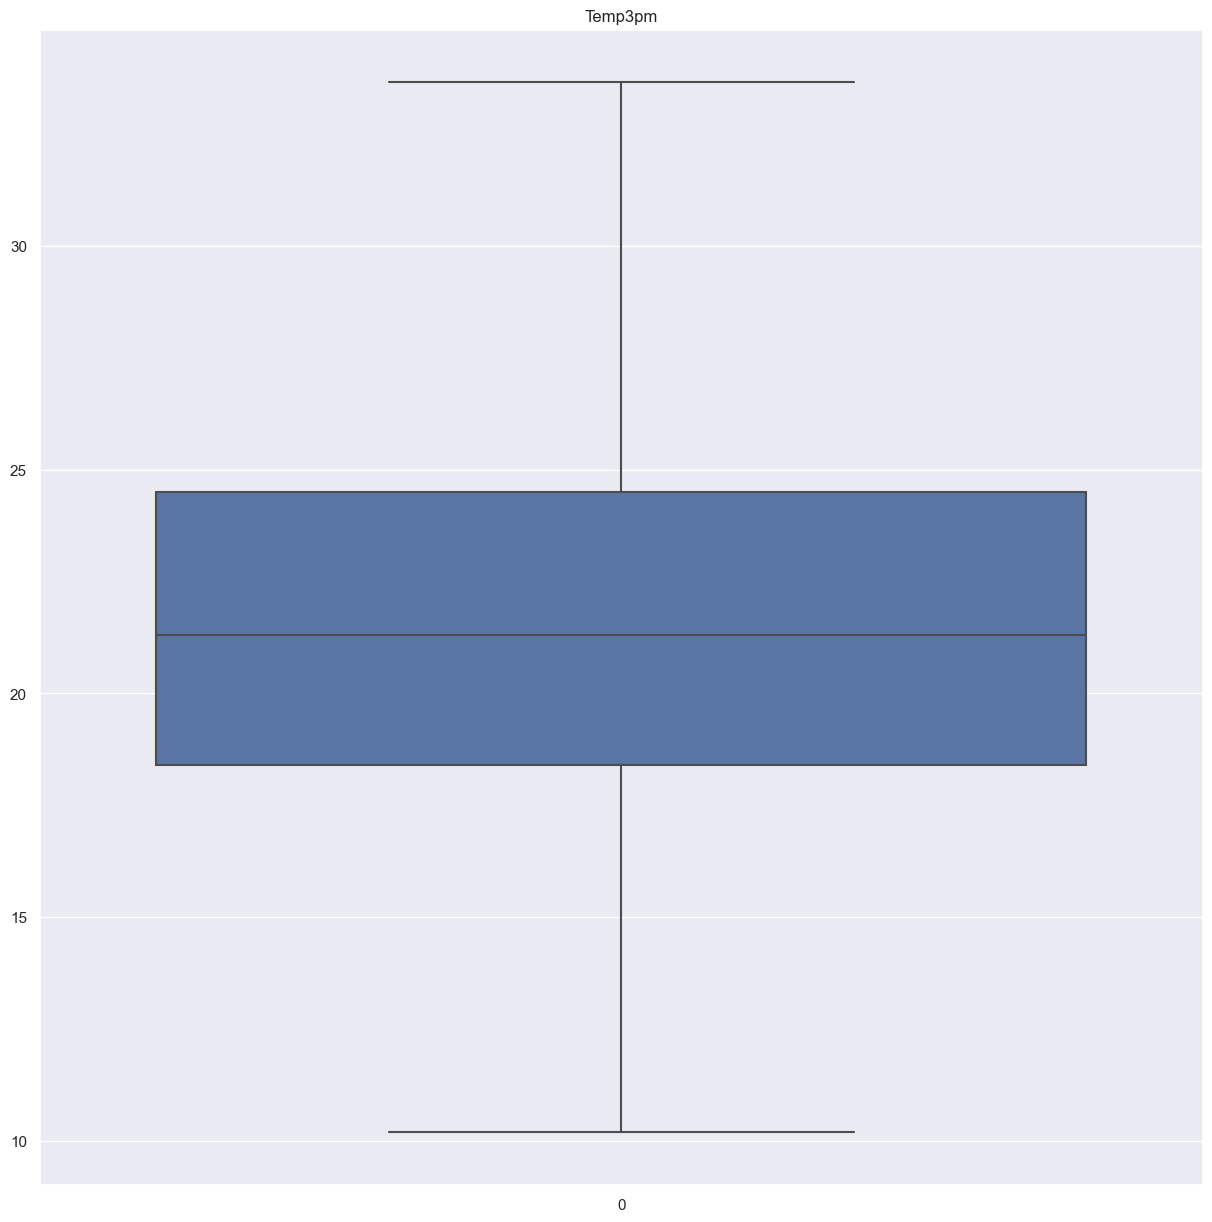

<Figure size 1500x1500 with 0 Axes>

In [32]:
# Looping through each numerical column and create a boxplot whether to identify any outlier after treatment

for feature in numerical_columns:
    data = df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

## c) Dummy Variable creation

In [33]:
# Use pd.get_dummies() to create dummy variables for categorical columns
# The drop_first=True parameter drops the first level of each categorical feature to avoid multicollinearity

df = pd.get_dummies(df, drop_first=True)

In [34]:
# To show first five rows of dataframe
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,19.5,22.4,3.4999,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,19.5,25.6,3.4999,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,21.6,24.5,3.4999,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,20.2,22.8,3.4999,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,19.7,25.7,3.4999,4.8,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


## d) Data Visualisation

Text(0.5, 1.0, 'Mean Rainfall over Years')

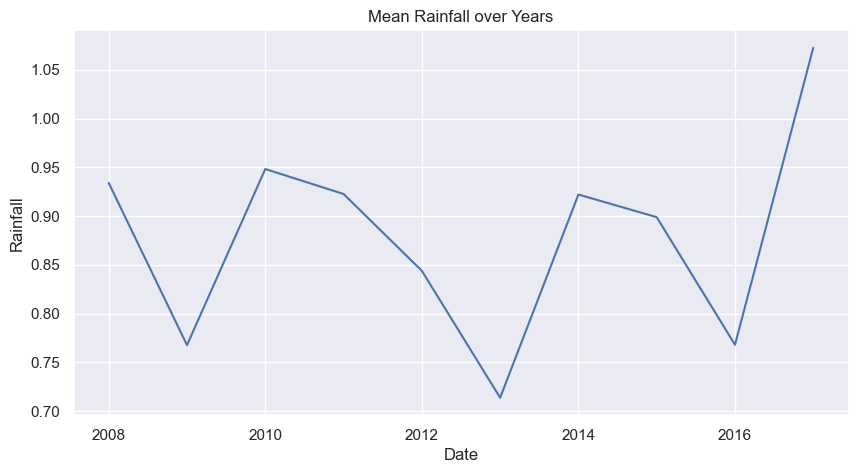

In [35]:
# Converting the 'Date' column to pandas date-time format.
df['Date'] = pd.to_datetime(df['Date'])

# Grouping the DataFrame by year and calculate the mean rainfall for each year.
RF_year = df.groupby(df['Date'].dt.year)['Rainfall'].mean()

# Setting the size of the figure
fig = plt.gcf()
fig.set_size_inches((10, 5))

# Create a bar plot using Seaborn
# x = RF_year.index: The years from the index of RF_year DataFrame (which is the years).
# y = RF_year: The mean rainfall values for each year
fig1 = sns.lineplot(x = RF_year.index, y = RF_year)
fig1.set_title("Mean Rainfall over Years")

Text(0.5, 1.0, 'Mean Minimum temperature over years')

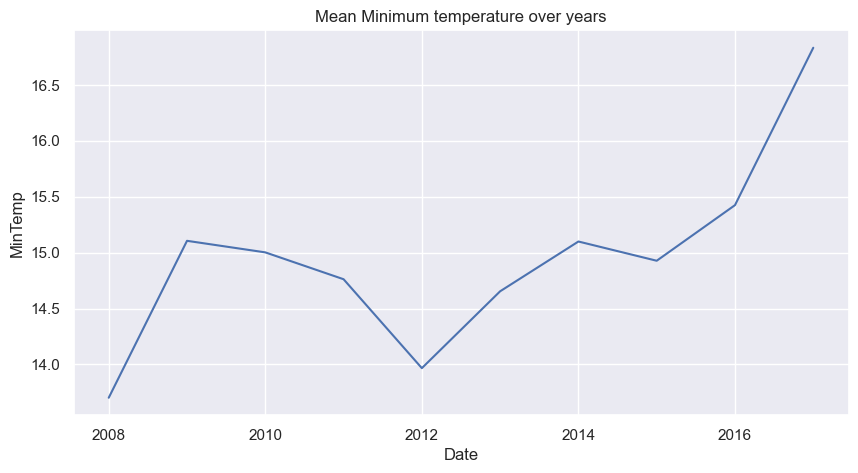

In [36]:
# Group the DataFrame by year and calculate the mean minimum temperature for each year
MinTemp_year = df.groupby(df['Date'].dt.year)['MinTemp'].mean()

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches((10, 5))

# Create a line plot using Seaborn
# x = MinTemp_year.index: The years from the index of MinTemp_year DataFrame (which is the years)
# y = MinTemp_year: The mean minimum temperature values for each year
# palette = sns.color_palette("Paired"): The color palette for the line
fig2 = sns.lineplot(x = MinTemp_year.index, y = MinTemp_year)
fig2.set_title("Mean Minimum temperature over years")

Text(0.5, 1.0, 'Mean evaporation for years')

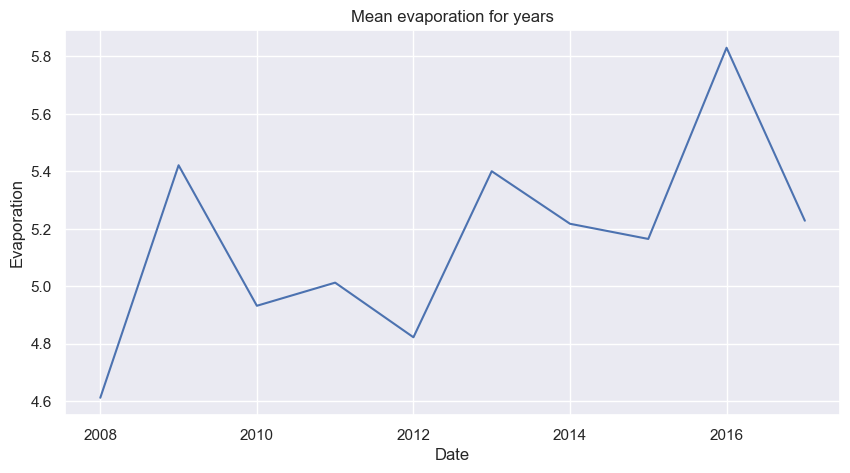

In [37]:
# Convert the 'Date' column to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the DataFrame by year and calculate the mean evaporation for each year
Ev_year = df.groupby(df['Date'].dt.year)['Evaporation'].mean()

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches((10, 5))

# Create a bar plot using Seaborn
# x = Ev_year.index: The years from the index of Ev_year DataFrame (which is the years)
# y = Ev_year: The mean evaporation values for each year
# palette = sns.color_palette("Paired"): The color palette for the bars
fig3 = sns.lineplot(x = Ev_year.index, y = Ev_year)
fig3.set_title("Mean evaporation for years")

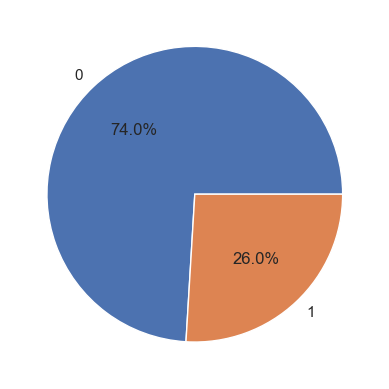

In [38]:
plt.pie(df['RainToday_Yes'].value_counts().values,               # df['RainToday_Yes'].value_counts().values: 
        labels = df['RainToday_Yes'].value_counts().index,       # Counts of unique values in the 'RainToday_Yes' column
        autopct='%1.1f%%')                                       # autopct='%1.1f%%': For displaying the %age on each slice

plt.show()

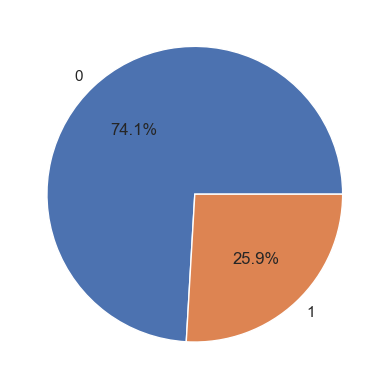

In [39]:
#Counting the Count of 'NO' and 'YES' from the column RainTomorrow 
plt.pie(df['RainTomorrow_Yes'].value_counts().values,
        labels = df['RainTomorrow_Yes'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

### Observation:
#### We can see the Class Imbalance from the above plot. It is better to resample the data for better accuracy.

## e) Resample the data to avoid class imbalance

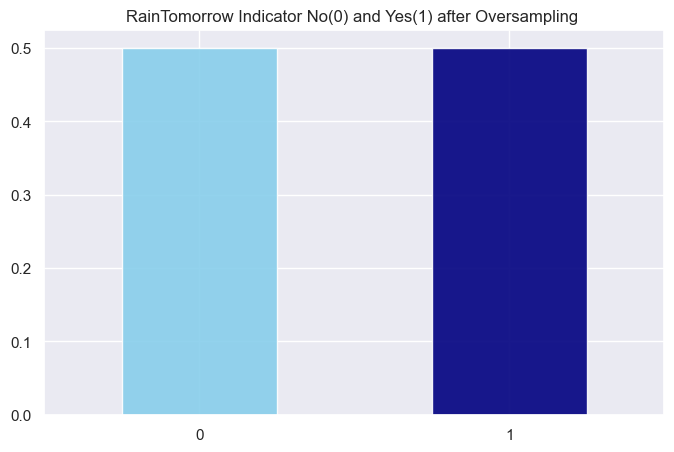

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
9,2008-02-10,14.6,24.2,3.4999,4.4,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,1,0
10,2008-02-11,16.4,23.9,0.0000,6.4,8.0,78.0,53.0,1017.6,1015.3,7.0,8.0,18.9,23.7,0,0
13,2008-02-14,16.9,24.3,3.0000,3.2,8.7,81.0,51.0,1017.2,1016.5,7.0,1.0,18.4,23.3,1,0
14,2008-02-15,18.3,24.4,0.0000,6.2,8.5,80.0,56.0,1020.2,1018.9,7.0,3.0,19.5,23.8,0,0
15,2008-02-16,16.7,24.1,0.0000,6.2,8.8,77.0,52.0,1023.0,1022.6,7.0,6.0,19.8,23.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,2017-06-21,8.6,19.6,0.0000,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0,0
3333,2017-06-22,9.3,19.2,0.0000,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0,0
3334,2017-06-23,9.4,17.7,0.0000,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0,0
3335,2017-06-24,10.1,19.3,0.0000,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0,0


In [40]:
from sklearn.utils import resample
# Perform oversampling of the 'Yes' class using resample
# replace=True allows sampling with replacement, n_samples=len(no) specifies the number of samples to match the size of the 'No' class
# random_state=123 sets a fixed random seed for reproducibility
no = df[df.RainTomorrow_Yes == 0]
yes = df[df.RainTomorrow_Yes == 1]
yes_oversampled = resample(yes, replace = True, n_samples = len(no), random_state = 123)
df = pd.concat([no, yes_oversampled])

# Create a bar plot to show the distribution of 'RainTomorrow_Yes' classes after oversampling
fig = plt.figure(figsize = (8,5))
df.RainTomorrow_Yes.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling ')
plt.show()
no

##  f) Splitting data into X and Y

In [41]:
# X contains the feature columns (independent variables)
X = df.drop(['RainTomorrow_Yes', 'Date'], axis=1)

In [42]:
# y contains the target column (dependent variable)
y = df[['RainTomorrow_Yes']]

In [43]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
9,14.6,24.2,3.4999,4.4,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,1
10,16.4,23.9,0.0000,6.4,8.0,78.0,53.0,1017.6,1015.3,7.0,8.0,18.9,23.7,0
13,16.9,24.3,3.0000,3.2,8.7,81.0,51.0,1017.2,1016.5,7.0,1.0,18.4,23.3,1
14,18.3,24.4,0.0000,6.2,8.5,80.0,56.0,1020.2,1018.9,7.0,3.0,19.5,23.8,0
15,16.7,24.1,0.0000,6.2,8.8,77.0,52.0,1023.0,1022.6,7.0,6.0,19.8,23.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,10.0,16.7,3.4999,2.4,0.2,93.0,90.0,1016.3,1014.8,8.0,6.0,10.6,13.8,1
122,14.3,17.6,3.4999,1.8,0.1,97.0,90.0,1027.3,1024.8,8.0,7.0,15.3,17.1,1
2983,12.9,17.2,3.4999,6.4,1.6,85.0,86.0,1015.4,1016.5,7.0,7.0,14.9,14.6,1
2996,16.5,16.9,3.4999,2.4,0.0,91.0,90.0,1019.7,1018.4,8.0,8.0,16.7,16.2,1


In [44]:
y

,RainTomorrow_Yes
9,0
10,0
13,0
14,0
15,0
...,...
1879,1
122,1
2983,1
2996,1


## g) Model Training and Feature Scaling data
Splitting Dataset into Training set and Testing set Dividing the Training and Testing Data in 80:20

## Train-test splitting 

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
y_test.shape

(989, 1)

In [47]:
X_train.shape

(3955, 14)

## Feature Scaling data

In [48]:
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Use the fit_transform method of the StandardScaler to standardize the feature matrix X
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [49]:
X_test_s

array([[ 0.70203876,  1.81483511,  1.49184763, ...,  0.7912259 ,
         1.21661884,  1.37543188],
       [ 1.65982862,  2.7392019 , -0.75361465, ...,  2.46355035,
         2.89919053, -0.72704436],
       [-1.92631481, -1.04844737, -0.75361465, ..., -1.92630133,
        -1.05775394, -0.72704436],
       ...,
       [ 1.12524824,  0.37192111, -0.75361465, ...,  0.87484213,
         0.52038227, -0.72704436],
       [-1.48083115, -0.73280993, -0.75361465, ..., -1.2782756 ,
        -0.50076469, -0.72704436],
       [ 0.94705477,  0.89046833, -0.75361465, ...,  0.87484213,
         0.70604536, -0.72704436]])

# ---------------------------------------------------------------------------------------------------------------- 

# 3. Evaluating Different ML models 

## 1) Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression  
# Create an instance of the LogisticRegression model with random_state=0 for reproducibility
cl_lr = LogisticRegression(random_state = 0)

# Fit the logistic regression model to the training data
cl_lr.fit(X_train_s, y_train) 

LogisticRegression(random_state=0)

In [51]:
# Use the predict method of the logistic regression model to make predictions on the test data X_test_s
y_pred_lr = cl_lr.predict(X_test_s)

In [52]:
# Model evaluation on the basis of various performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate the accuracy score by comparing the true labels Y_test with the predicted labels y_pred_lr
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_score = precision_score(y_test, y_pred_lr)
recall_score = recall_score(y_test, y_pred_lr)

# Print the evaluation metrics
print("Accuracy score for logistic regression:", accuracy_lr)
print("Precision score for logistic regression:", precision_score)
print("Recall score for logistic regression:", recall_score)

Accuracy score for logistic regression: 0.7805864509605662
Precision score for logistic regression: 0.7823408624229979
Recall score for logistic regression: 0.774390243902439


In [53]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
confusion_matrix(y_test, y_pred_lr)

array([[391, 106],
       [111, 381]], dtype=int64)

The ROC score for the model: 0.7805552829170143


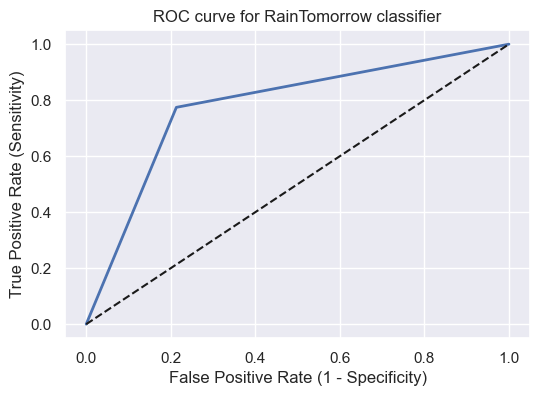

In [54]:
# Plotting ROC Curve

from sklearn.metrics import roc_auc_score, roc_curve

# Printing ROC AUC score

roc_auc = roc_auc_score(y_test, y_pred_lr)
print("The ROC score for the model:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr, drop_intermediate = False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Model Evaluation 
 - The evaluation metrics like **accuracy score (0.780), precision score (0.782), and recall score (0.774)** seem to be pretty **good** for Logistic Regression model. 
 - The ROC curve also shows a decent coverage.
 
But we should not stop here as there may still be room for some improvement.

# ----------------------------------------------------------------------------------------------------------------

## 2) Linear Discriminant Analysis

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [56]:
# Create an instance of the Linear Discriminant Analysis (LDA) classifier

clf_lda = LinearDiscriminantAnalysis()

In [57]:
# Fit the LDA classifier to the training data

clf_lda.fit(X_test_s, y_test)

LinearDiscriminantAnalysis()

In [58]:
# Make predictions on new data (X_test_s)

y_pred_lda = clf_lda.predict(X_test_s)

In [59]:
# Model Evaluation 

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate the accuracy score by comparing the true labels y_test with the predicted labels y_pred_lr

accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_score = precision_score(y_test, y_pred_lda)
recall_score = recall_score(y_test, y_pred_lda)
print("Accuracy score for LDA:", accuracy_lda)
print("Precision score for LDA:", precision_score)
print("Recall score for LDA:", recall_score)

Accuracy score for LDA: 0.7745197168857432
Precision score for LDA: 0.7880085653104925
Recall score for LDA: 0.7479674796747967


In [60]:
#Creating the Confusion matrix

from sklearn.metrics import confusion_matrix  
confusion_matrix(y_test, y_pred_lda)

array([[398,  99],
       [124, 368]], dtype=int64)

ROC score for the LDA model: 0.77438615432432


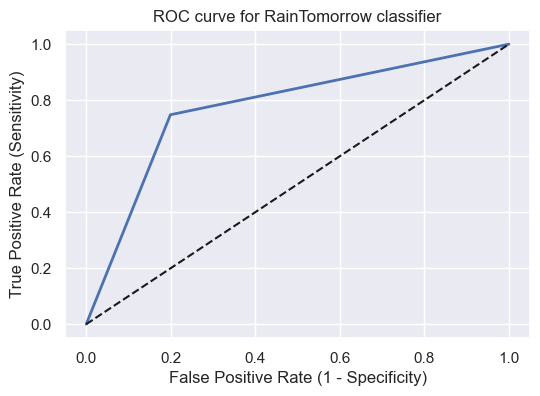

In [61]:
# plot ROC Curve

from sklearn.metrics import roc_auc_score

#Print ROC score

roc_auc_lda = roc_auc_score(y_test, y_pred_lda)
print("ROC score for the LDA model:", roc_auc_lda)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda, drop_intermediate=False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Model Evaluation 
 - The evaluation metrics like **accuracy score (0.774), precision score (0.788), and recall score (0.747)** seem to be pretty **decent** for the LDA model. 
 - The ROC curve also shows a decent coverage.
 
But we should not stop here as there may still be room for some improvement.

# ----------------------------------------------------------------------------------------------------------------

## 3) K_Nearest_Neighbors(KNN)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
# Create an instance of the K-Nearest Neighbors (KNN) classifier with n_neighbors=1

clf_knn = KNeighborsClassifier(n_neighbors = 1)

In [64]:
# Fit the KNN classifier to the training data

clf_knn.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
# Make predictions on new data (X_test_s)

y_pred_knn = clf_knn.predict(X_test_s)

In [66]:
# Model Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Print performance metrics

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_score = precision_score(y_test, y_pred_knn)
recall_score = recall_score(y_test, y_pred_knn)
print("Accuracy score for LDA:", accuracy_knn)
print("Precision score for LDA:", precision_score)
print("Recall score for LDA:", recall_score)

Accuracy score for LDA: 0.8968655207280081
Precision score for LDA: 0.8584558823529411
Recall score for LDA: 0.9491869918699187


In [67]:
#Creating the Confusion matrix

from sklearn.metrics import confusion_matrix  
confusion_matrix(y_test, y_pred_knn)

array([[420,  77],
       [ 25, 467]], dtype=int64)

ROC score for the KNN model: 0.897128707202565


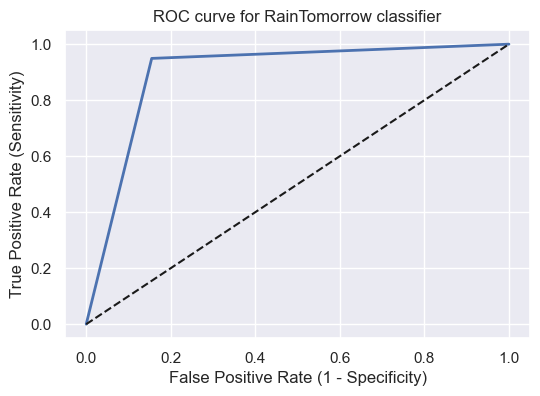

In [68]:
# plot ROC Curve

from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
print("ROC score for the KNN model:",roc_auc_knn)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn, drop_intermediate=False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Model Evaluation 
 - The evaluation metrics like **accuracy score (0.896), precision score (0.858), and recall score (0.9491)** seem to be pretty **accurate** for the KNN model. 
 - The Coverage of ROC curve is also very good.
 
But we should not stop here as there may still be room for some improvement.

# ----------------------------------------------------------------------------------------------------------------

## 4) Decision Trees

In [69]:
from sklearn.tree import DecisionTreeClassifier  

In [70]:
#Fitting Decision Tree classifier to the training set 

clf_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)  
clf_dt.fit(X_train_s, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [71]:
# Use the trained Decision Tree classifier to make predictions on X_test_s

y_pred_dt = clf_dt.predict(X_test_s)

In [72]:
# Print the model performance metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

print("Accuracy score for Decision Tree:", accuracy_dt)
print("Precision score for Decision Tree:", precision_dt)
print("Recall score for Decision Tree:", recall_dt)

Accuracy score for Decision Tree: 0.8493427704752275
Precision score for Decision Tree: 0.8369351669941061
Recall score for Decision Tree: 0.8658536585365854


In [73]:
# Print the confusion matrix
confusion_matrix(y_test, y_pred_dt) 

array([[414,  83],
       [ 66, 426]], dtype=int64)

Receiver_operating_characteristics_score: 0.8494258232320754


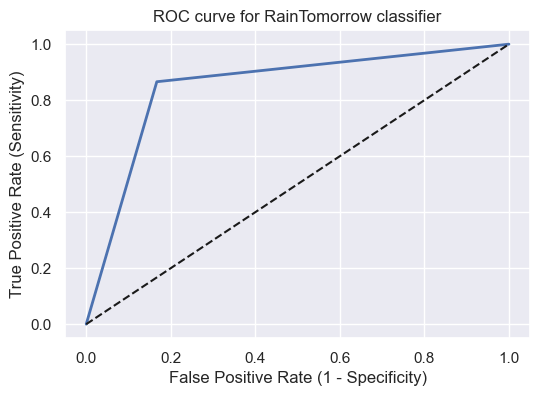

In [74]:
# Print ROC curve and ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt, drop_intermediate=False)

roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print("Receiver_operating_characteristics_score:", roc_auc_dt)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Model Evaluation 
 - The evaluation metrics like **accuracy score (0.849), precision score (0.837), and recall score (0.865)** seem very good for the Decision Tree Classifier model. 
 - The Coverage of ROC curve is also good.
 
Although the acccuracy of the model seems amazing, we should still keep on searching for the best possible model (if left).

# ----------------------------------------------------------------------------------------------------------------

## 5) Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
# Fitting the Naive Bayes model for train data

clf_nb = GaussianNB()
clf_nb.fit(X_train_s, y_train)

GaussianNB()

In [77]:
# Use the trained Decision Tree classifier to make predictions on X_test

y_pred_nb = clf_nb.predict(X_test_s)

In [78]:
# Print the performance metrics for model evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

print("Accuracy score for Naive Bayes:", accuracy_nb)
print("Precision score for Naive Bayes:", precision_nb)
print("Recall score for Naive Bayes:", recall_nb)

Accuracy score for Naive Bayes: 0.7623862487360971
Precision score for Naive Bayes: 0.7671517671517671
Recall score for Naive Bayes: 0.75


In [79]:
# Print the confusion matrix
confusion_matrix(y_test, y_pred_nb) 

array([[385, 112],
       [123, 369]], dtype=int64)

Receiver_operating_characteristics_score: 0.7623239436619718


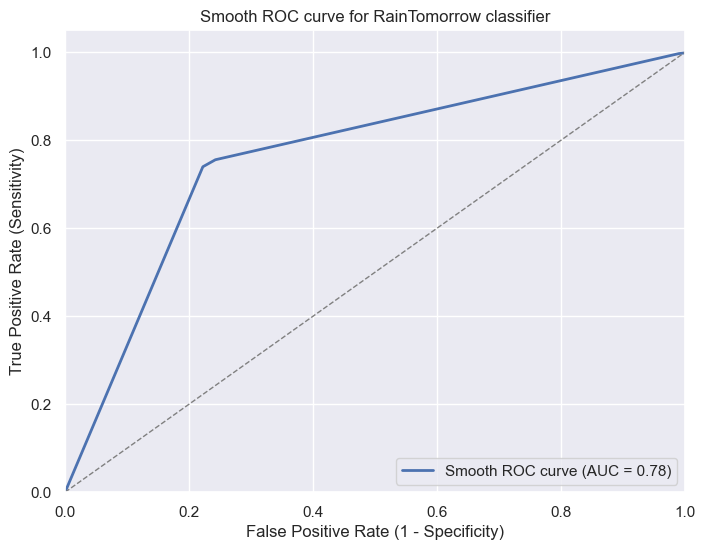

In [80]:
# Print ROC curve and ROC score
from scipy import interp
fpr, tpr, _ = roc_curve(y_test, y_pred_nb)
mean_fpr = np.linspace(0, 2, 100)
mean_tpr = interp(mean_fpr, fpr, tpr)
roc_auc_rfs = roc_auc_score(y_test, y_pred_nb)
print("Receiver_operating_characteristics_score:",roc_auc_rfs)

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b', lw=2, label='Smooth ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Smooth ROC curve for RainTomorrow classifier')
plt.legend(loc='lower right')
plt.show()

## Model Evaluation 
 - The evaluation metrics like **accuracy score (0.762), precision score (0.767), and recall score (0.75)** seem decent for the Naive Bayes model. 
 - The Coverage of ROC curve is also fine looking.

# ----------------------------------------------------------------------------------------------------------------

# Ensemble Methods -  

## 6) Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [82]:
# Creating a Random Forest classifier

clf_rf_cv = RandomForestClassifier(random_state = 0)

In [83]:
# Defining the hyperparameter grid for furture use in GridSearch.

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [6, 7, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [84]:
# Performing Grid Search to find the best hyperparameters.

grid_search = GridSearchCV(estimator = clf_rf_cv, param_grid = param_grid_rf, cv = 5, n_jobs = -1)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [85]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}

In [86]:
# Getting the best model.

best_rf_model = grid_search.best_estimator_

In [87]:
# Making predictions on new data (X_test_s).

y_pred_rf = grid_search.predict(X_test_s)

In [88]:
# Using the best model to make predictions and evaluate.

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_rf = best_rf_model.score(X_test_s, y_test)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print("Best Model Accuracy:", accuracy_rf)
print("Best Model Precision:",precision_rf)
print("Best Model Recall:",recall_rf)

Best Model Accuracy: 0.9201213346814965
Best Model Precision: 0.8994197292069632
Best Model Recall: 0.9451219512195121


In [89]:
# Creating the Confusion matrix

confusion_matrix(y_test, y_pred_rf) 

array([[445,  52],
       [ 27, 465]], dtype=int64)

ROC score: 0.9202470923099573


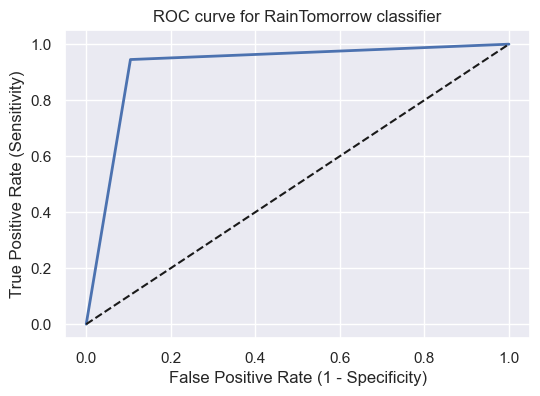

In [90]:
# Plot the ROC Curve and ROC score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf, drop_intermediate=False)

roc_auc_best_rf = roc_auc_score(y_test, y_pred_rf)
print("ROC score:",roc_auc_best_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Model Evaluation 
 - The evaluation metrics like **accuracy score (0.920), precision score (0.90), and recall score (0.945)** are remarkable and commendable for the Random Forest model. 
 - The Coverage of ROC curve is also very good.
 
Although the acccuracy of the model seems amazing we should still keep on searching for the best possible model (if left).

# ----------------------------------------------------------------------------------------------------------------

## 7) Gradient Boosting 

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [92]:
# Creating the Gradient boost classifier model.

clf_gb = GradientBoostingClassifier(random_state = 0)

In [93]:
params_grid_gb = {
    "n_estimators": [250, 500, 1000],
    "learning_rate": np.linspace(0.01, 0.1, 5),
    "max_depth": [1, 2, 3]
}

In [94]:
# Performing Grid Search to find the best hyperparameters.

grid_search_gb = GridSearchCV(clf_gb, param_grid = params_grid_gb, cv = 5, n_jobs = -1, scoring = "accuracy")

In [95]:
grid_search_gb.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01  , 0.0325, 0.055 , 0.0775, 0.1   ]),
                         'max_depth': [1, 2, 3],
                         'n_estimators': [250, 500, 1000]},
             scoring='accuracy')

In [96]:
grid_search_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}

In [97]:
# Getting the best model by hyperparameter tuning using GridSearchCV

gb_cv = grid_search_gb.best_estimator_

In [98]:
y_pred_gb = gb_cv.predict(X_test_s)

In [99]:
# Using the best model to make predictions and evaluate.

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_gb = best_rf_model.score(X_test_s, y_test)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
print("Best Model Accuracy:", accuracy_gb)
print("Best Model Precision:",precision_gb)
print("Best Model Recall:",recall_gb)

Best Model Accuracy: 0.9201213346814965
Best Model Precision: 0.8545816733067729
Best Model Recall: 0.8719512195121951


In [100]:
# Creating the Confusion matrix

confusion_matrix(y_test, y_pred_gb) 

array([[424,  73],
       [ 63, 429]], dtype=int64)

ROC score: 0.8625349658929186


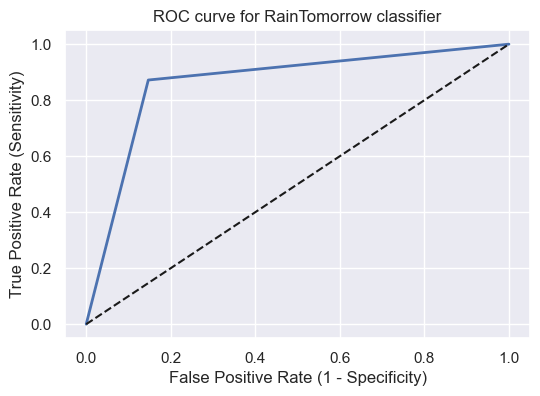

In [101]:
# Plot the ROC Curve and ROC score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb, drop_intermediate = False)

roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
print("ROC score:", roc_auc_gb)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Model Evaluation 
 - The evaluation metrics like **accuracy score (0.920), precision score (0.854), and recall score (0.872)** seem amazing for the Gradient Boost model. 
 - The Coverage of ROC curve is also very good.
 
Although the acccuracy of the model seems amazing, Random forest still seems to be the best fit model, but we should still keep on searching for the best possible model (if left).

# ---------------------------------------------------------------------------------------------------------------- 

## 8) XG Boost Classifier

In [102]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [103]:
# Create an XGBoost Classifier

xgb_clf = xgb.XGBClassifier(
    learning_rate = 0.1,
    n_estimators = 10000,                   # Number of boosting rounds (trees)
    max_depth = 3,                          # Maximum depth of each tree
    gamma = 0,                              # Minimum loss reduction required to make a further partition on a leaf node
    subsample = 0.8,                        # Subsample ratio of the training instances
    objective = 'binary:logistic',          # Binary classification
)

In [104]:
# Train the XGBoost Classifier on the training data

xgb_clf.fit(X_train_s, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [105]:
# Make predictions on the test set

y_pred_xgb = xgb_clf.predict(X_test_s)

In [106]:
# Calculate accuracy

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)
print("Best Model Precision:",precision_xgb)
print("Best Model Recall:",recall_xgb)

XGBoost Classifier Accuracy: 0.9019211324570273
Best Model Precision: 0.871939736346516
Best Model Recall: 0.9410569105691057


ROC score: 0.9021179925078928


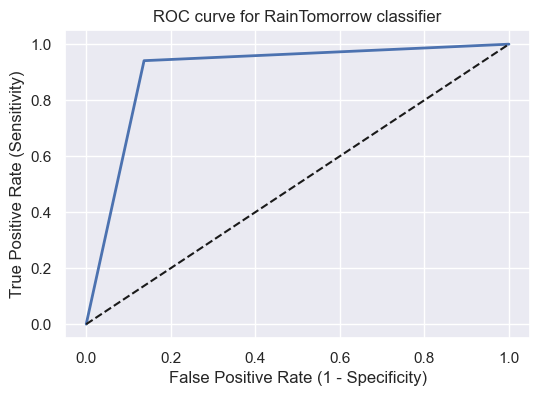

In [107]:
# Plot the ROC Curve and ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb, drop_intermediate=False)

roc_auc_best_xgb = roc_auc_score(y_test, y_pred_xgb)
print("ROC score:", roc_auc_best_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Model Evaluation 
 - The evaluation metrics like **accuracy score (0.902), precision score (0.871), and recall score (0.941)** are amazing for the XG Boost Model. 
 - The Coverage of ROC curve is also very good.
 
Although the acccuracy of the model seems amazing, it is not as high as the Random Forest model.

# ----------------------------------------------------------------------------------------------------------------

### Since we have evaluated a number of Classification models on our data, now it's time to select the best Model out of all the models.

# 4. Model Selection for best accuracy

### Comparing the accuracies of different models to find the best among them.

In [108]:
# Create a dictionary containing the accuracy scores of different models

accuracy_dict = {
    "Logistic Regression": accuracy_lr,
    "LDA": accuracy_lda,
    "KNN": accuracy_knn,
    "Random Forest": accuracy_rf,
    "Gradient Boosting": accuracy_gb,
    "XG Boost": accuracy_xgb,
    "Decision Trees": accuracy_dt,
    "Naive Bayes": accuracy_nb
}

# Create a pandas DataFrame from the accuracy_dict with "Accuracy" as the column name

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,0.780586
LDA,0.774520
KNN,0.896866
Random Forest,0.920121
Gradient Boosting,0.920121
XG Boost,0.901921
Decision Trees,0.849343
Naive Bayes,0.762386


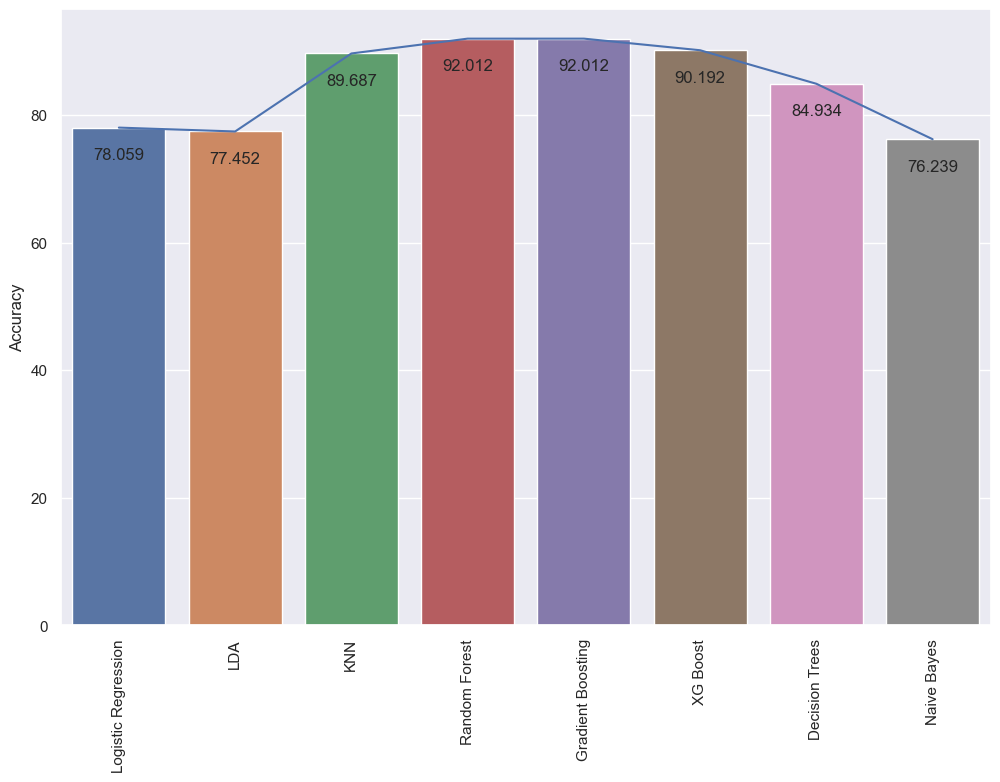

In [109]:
# Create Visualization for different model trained accuracy for comparison

fig = plt.gcf();
fig.set_size_inches(12, 8);

sns.lineplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);
sns.barplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);

for i, val in enumerate(accuracy_df.index):        # The enumerate function returns both the index and the value at that index.
    y = round(accuracy_df.loc[val].sum()*100, 3)   # Rounding the accuracy values to percentages.       
    plt.xticks(rotation=90)
    plt.text(i, y-5, str(y), ha = "center")

## Observations:
The best-performing model is the **Random Forest**, which achieved the highest accuracy of 92.417 %, a precision score of 0.90 and a recall score of 0.945 on the given dataset. It outperformed all other models in terms of Accuracy, Precision and Recall metrics and is recommended for further consideration for deployment on new data.

# ----------------------------------------------------------------------------------------------------------------

# 5. Checking the best Model on new Data

In [110]:
import pandas as pd

In [111]:
# Providing New (Scaled) data to the model to see the Rainfall Prediction for tomorrow.

sample_input1 = [[0.63464341,  0.78950695, -0.74813939,  1.38249221, -0.28043359,
       -0.72816562,  0.59585389, -1.53525385, -1.47983304,  0.89758074,
        1.37555071,  0.98013002,  0.09293367, -0.71422571]]

sample_input2 = [[-1.49329065, -1.13748345, -0.74813939, -0.47469902,  0.65186925,
       -1.12153121, -1.27066926, -1.49201465, -1.72171035, -1.52337755,
       -1.55384324, -1.39637561, -1.13139488, -0.71422571]]

In [112]:
# sample_input1 prediction

prediction1 = best_rf_model.predict(sample_input1) 

pred = prediction1[0]

if pred == 0:
    print("Tomorrow there will be no Rain fall")
else:
    print("Tomorrow there will be Rain fall")

Tomorrow there will be Rain fall


In [113]:
# sample_input2 prediction

prediction2 = best_rf_model.predict(sample_input2) 

pred = prediction2[0]

if pred == 0:
    print("Tomorrow there will be no Rain fall")
else:
    print("Tomorrow there will be Rain fall")

Tomorrow there will be no Rain fall


#### Therefore it seems Random Forest model perfoms well on our sample data as well.

# ----------------------------------------------------------------------------------------------------------------

# <ins>Task</ins>

## 1) Your views about the problem statement?

The problem statement presented is relevant and practical. Predicting rainfall is a crucial task, as it has a significant impact on various aspects of life, including agriculture, transportation, and public safety. The scenario of a newspaper company wanting to provide accurate weather predictions to its readers in Sydney adds a realistic and practical dimension to the problem.

Some key points about the problem statement:

- It addresses a real-world problem where machine learning can make a valuable contribution.
- It provides a clear objective: building a machine learning model to predict rainfall.
- The dataset provided contains relevant weather-related features, making it suitable for modeling.
- The use of classification techniques, such as decision trees and ensemble methods, aligns with the nature of the problem (predicting binary outcomes - rain or no rain).

Overall, the problem statement is well-defined and has a practical application, making it an interesting and meaningful task for a machine learning expert to work on.

## -------------------------------------------------------------------------------------------------------------------------------------

## 2. What will be your approach to solving this task?

My approach would follow the steps outlined in the problem statement:

- **Data Loading and Preprocessing:** 
Clean and prepare the dataset for analysis.
- **Model Building and Evaluation:** 
Implement various classification models, including Decision Trees and Ensemble methods (Random Forest and Gradient Boosting).
- **Model Comparison:** 
Compare the performance of these models using relevant metrics like accuracy score, precision score, recall score, etc
- **Select the Best Model:** 
Choose the model with the best accuracy and give the reason for it's best performance.
- **Improve Model Performance:** 
Suggest steps to further enhance the selected model's accuracy like:
    - Hyperparameter tuning: Experiment with different hyperparameters for the selected model to find the optimal configuration.
    - Cross-validation: Use techniques like k-fold cross-validation to ensure the model's generalizability.

## -------------------------------------------------------------------------------------------------------------------------------------

# 3. What were the available ML model options you had to perform this task?
- The available ML models options available for this task include:
1. Logistic Regression
2. Linear Discreminant Analysis(LDA)
3. K-Nearest_Neighbors(KNN)
4. Naive Bayes
5. Decision Trees
6. Random Forest (an Ensemble method)
7. Gradient Boosting (an Ensemble method)
8. XG Boost (an Ensemble method)

## ------------------------------------------------------------------------------------------------------------------------------------- 

# 4. Which model’s performance is best and what could be the possible reason for that?
Based on the accuracy scores, the best-performing model is the one with the highest accuracy scores.

**Random Forest with Grid Search: 0.9201**

The possible reason for Random Forest with Grid Search performing the best could be:

Ensemble Method: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It leverages the power of multiple decision trees and reduces the risk of overfitting, resulting in better generalization to new data.

Hyperparameter Tuning: The Grid Search process likely helped in finding the best hyperparameters for the Random Forest model, optimizing its performance.

Robust to Outliers: Random Forest is known to be less sensitive to outliers and noisy data compared to some other models, which can result in better performance on real-world datasets.

Feature Importance: Random Forest provides a measure of feature importance, which can help in understanding the significance of different features in predicting the target variable. This can lead to better feature selection and model performance.

Handling Non-Linearity: Random Forest can handle non-linear relationships between features and the target variable effectively, making it suitable for datasets with complex relationships.

## -------------------------------------------------------------------------------------------------------------------------------------

# 5. What steps can you take to improve this selected model’s performance even further?
To improve the selected model's performance, we can consider the following steps:

1.Hyperparameter tuning: We can fine-tune the hyperparameters of the selected model to achieve better performance.

2.Feature engineering: We can create new features or extract more relevant information from existing features to improve the model's predictive power.

3.Data augmentation: If the dataset is limited, we can use data augmentation techniques to create additional synthetic data points for training.

4.Ensemble techniques: We can try combining multiple models using different ensemble methods to further boost accuracy.

5.Cross-validation: Perform cross-validation to ensure the model's generalization capability and avoid overfitting.

By thoroughly following these steps and experimenting with various techniques, we can iteratively improve the selected model's performance and achieve accurate rainfall predictions for Sydney.

## -------------------------------------------------------------------------------------------------------------------------------------